# Midterm Project Attempt

## A: Get data

### A.1: Get the data and have a look at the data

In this step, after getting data, I convert them into numeric values.

In [8]:
for f in data.columns:
    if data[f].dtype == 'O':
        data[f] = pd.to_numeric(data[f], errors='coerce')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.16050,-126.3900,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.3100,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.23740,22.0340,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.4460,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.56500,35.7660,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.7300,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68000,438.2000,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.7560,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.30360,-71.3980,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.5800,3.1854,2.7420,0,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.85790,0.98420,0.79415,...,0.266940,0.73275,0.022101,NaN,3.5081,66.1710,5.5160,1.4476,0,1985
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.04220,1.05160,0.90042,...,0.346400,0.70705,0.044114,14.0180,7.0618,20.7760,17.5680,2.9149,0,3963
4815,-0.029746,0.448980,0.39136,1.93880,7.8073,-0.020006,-0.030561,1.22590,1.00010,0.55040,...,-0.054046,0.99986,0.058336,15.5470,8.7022,34.3700,10.6200,23.0860,0,4167
4816,0.284730,0.079573,0.46261,6.81370,-81.1580,-0.795510,0.284730,11.56700,6.07180,0.92043,...,0.309350,0.19889,0.000000,NaN,28.5000,4.7834,76.3050,13.2630,0,1579


Here I check that I have managed to convert all of values to numeric ones.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

### A.2: Select a performance measure

In this step, I want to create my own metric. The reason is that this is common in literature relevant to dealing with an imbalance dataset and that the guideline gives us a specific numeric bias between positive samples and negative samples. In this context, I adjust the balanced accuracy score. In the binary case, balanced accuracy is equal to the arithmetic mean of sensitivity (true positive rate) and specificity (true negative rate). However, given information in the guideline, it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt, so it is 5 times better to identify a company that will go bankrupt(TP) than it is to identify a company that won't go bankrupt(TN). So I define a new balance accuracy as (5/6* true positive rate  + 1/6* true negative rate).

`sklearn` has provided convenient ways to create my own metrics. Here I simply implement a function named `bkrclf_accuracy_score()`, and call `sklearn`'s `make_scorer` to create a scorer compatible with `sklearn`'s metric structure. `bkrclf_accuracy_score()` is adapted from source code of `balanced_accuracy_score()`

In [10]:
from sklearn.metrics import make_scorer, confusion_matrix

def bkrclf_accuracy_score(y_true, y_pred, *, sample_weight=None):
    C = confusion_matrix(y_true, y_pred, sample_weight=sample_weight)
    with np.errstate(divide="ignore", invalid="ignore"):
        per_class = np.diag(C) / C.sum(axis=1)

    score = np.array([1/6, 5/6]) @ per_class
    #score = np.array([1/2, 1/2]) @ per_class
    return score
bkrclf_accuracy = make_scorer(bkrclf_accuracy_score) 

### A.3: Create a test set

In [11]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :64]
y = data['Bankrupt']
original_features = list(X.columns)
print('Original features: ')
print(original_features)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
X_train_df = pd.DataFrame(X_train, columns=original_features)

Original features: 
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64']
X_train shape:  (4336, 64)
X_test shape:  (482, 64)
y_train shape:  (4336,)
y_test shape:  (482,)


## B. Exploratory Data Analysis

In this section, I try to do several data check and visualizations to exploit potential issues that I can further explore for feature engineering and model selection.

First, to obtain an overview of the data's distribution, I take a look at the statistic description table of the dataset and visualize it into line charts to gain more intuitions.

Note, in order to avoid cheating, I depend solely on my training data.

<AxesSubplot:>

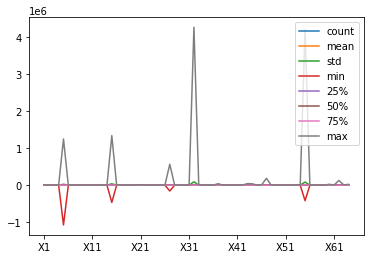

In [12]:
feature_describe = X_train_df.describe()
feature_describe.T.plot()

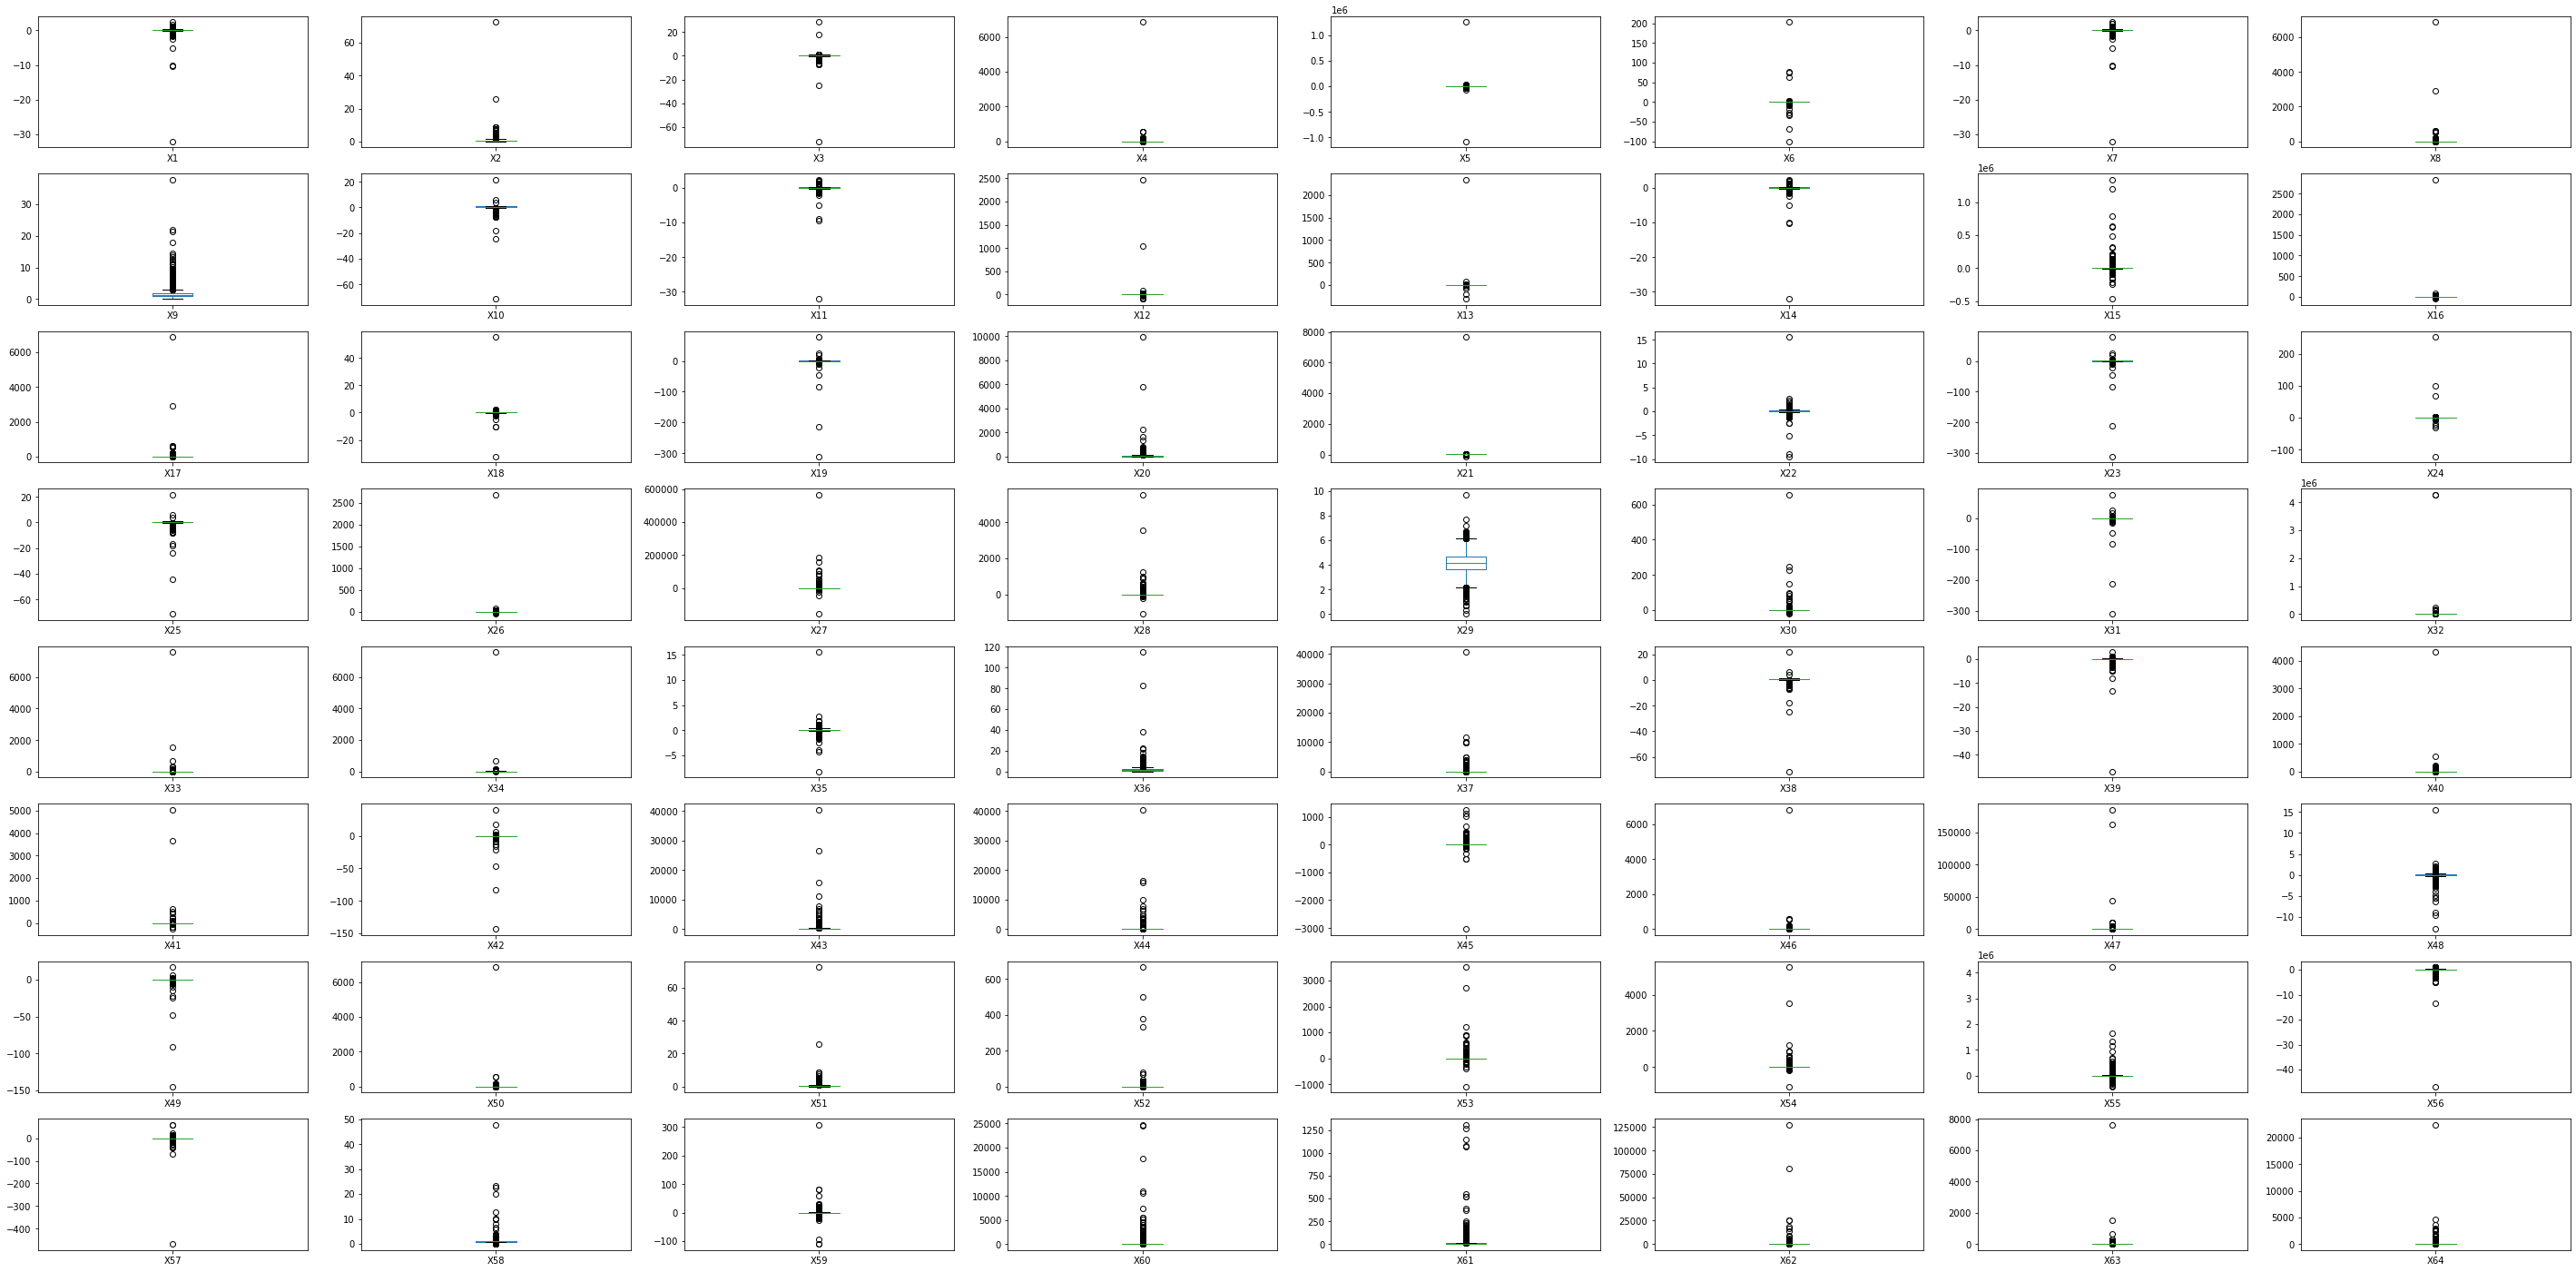

In [13]:
def visualize_feature_distribution(X_train_df_):
    fig,ax=plt.subplots(8,8, figsize=(50,25))
    for n, f in enumerate(X_train_df_.columns):
        _ = X_train_df_[f].plot(kind='box', ax=ax[n // 8][n - 8 * (n // 8)])
visualize_feature_distribution(X_train_df)

### B.1 Missing data

I notice there is potentially some missing data denoted as `NaN` in the data. I hereby count them across features.

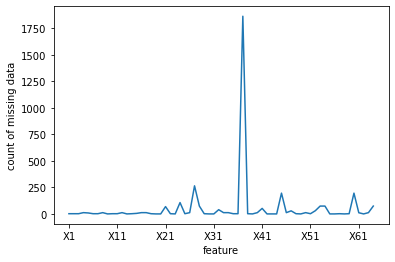

In [14]:
def visualize_missing_data(df):
    df.isna().sum().plot(xlabel='feature', ylabel='count of missing data')
    
visualize_missing_data(X_train_df)

In [15]:
print('The feature has the most missing data is {}, the count of its missing data is {}.'.format(
    X_train_df.isna().sum().idxmax(), X_train_df.isna().sum().max())
     )


The feature has the most missing data is X37, the count of its missing data is 1865.


As we can conclude from this picture, there is an extreme case where the total number of missing data in feature `X37` is as high as 1865, which takes almost 45% examples.

Apart from feature `X37`, on average the number of missing data is normal and I later simply implement a method to impute them.

### B.2 Scale of data

I also want to take a look at the scale of my data. Too varied scale among features may negatively impact model's performance. Here, I simply use the `mean` of feature to indicate scale.

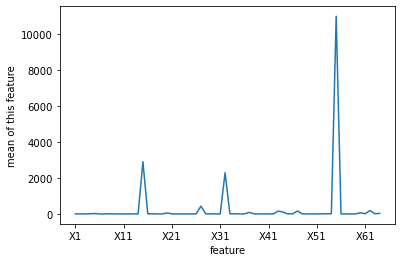

In [16]:
def visualize_data_scale(describe_df):
    describe_df.T['mean'].plot(xlabel='feature', ylabel='mean of this feature')
    
visualize_data_scale(feature_describe)

In [17]:
mean_sort_s = feature_describe.T['mean'].sort_values(ascending=False)[:3]
for n in range(3):
    print('The top {} largest mean is witnessed in feature {}, the mean is {:.2f}.'.format(n + 1, mean_sort_s.index[n], mean_sort_s.values[n]))

The top 1 largest mean is witnessed in feature X55, the mean is 11003.52.
The top 2 largest mean is witnessed in feature X15, the mean is 2906.95.
The top 3 largest mean is witnessed in feature X32, the mean is 2292.36.


Scale of the majority features seems to be consistent. However, there are also 3 features: `X55`, `X15`, `X32` whose mean are extremely large and apparently incompatible with other features' scale. **This hereby indicates the necessity to run scaling over this dataset.**



When trying to explain the consistency and inconsistency of these features with their real meanings, I come to realize that the majority of features have been expressed by a probability or ratio. However, for feature `X55`, the information says that it is `working capital`, which is actually an absolute number. The existence of abosulte number can explain why the scale of `X55` is so deviated from its counterparts. However, it also implies that for different samples, this value can vary from sample to sample significantly. While for other features expressed as a ratio, this issue might be trivial, but it is still possible that different samples' values are not in a unit form. **This hereby indicates the necessity to run normalization over this dataset.**

### B.3 Outliers

In order to fully examine the impact of outliers, I plot `max`, `min`, `mean` to detect whether there is any extreme case, since it is clear that extreme values will greatly affect classifier's decision.

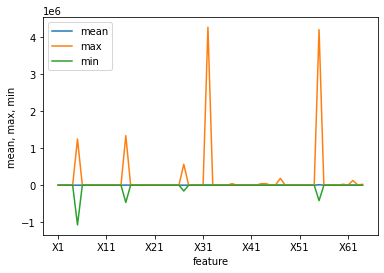

In [18]:
def visualize_outliers(describe_df):
    a = describe_df.T.copy()
    a[['mean', 'max', 'min']].plot(xlabel='feature', ylabel='mean, max, min')
    return a
mmm = visualize_outliers(feature_describe)

In [19]:
max_sort_s = mmm['max'].sort_values(ascending=False)[:5]
min_sort_s = mmm['min'].sort_values()[:5]
for n in range(5):
    print('The top {} largest max is witnessed in feature {}, the max is {:.2f}.'.format(n + 1, max_sort_s.index[n], max_sort_s.values[n]))
for n in range(5):
    print('The bottom {} smallest min is witnessed in feature {}, the min is {:.2f}.'.format(n + 1, min_sort_s.index[n], min_sort_s.values[n]))

The top 1 largest max is witnessed in feature X32, the max is 4277200.00.
The top 2 largest max is witnessed in feature X55, the max is 4212200.00.
The top 3 largest max is witnessed in feature X15, the max is 1341700.00.
The top 4 largest max is witnessed in feature X5, the max is 1250100.00.
The top 5 largest max is witnessed in feature X27, the max is 565940.00.
The bottom 1 smallest min is witnessed in feature X5, the min is -1076400.00.
The bottom 2 smallest min is witnessed in feature X15, the min is -466770.00.
The bottom 3 smallest min is witnessed in feature X55, the min is -419200.00.
The bottom 4 smallest min is witnessed in feature X27, the min is -158130.00.
The bottom 5 smallest min is witnessed in feature X45, the min is -3037.30.


When compare this with section B.2, I realize that the oilier itself is affected by number's scale. Larger scale indicates a larger possibility of extreme outlier. And if an extreme outlier exists simply because its scale is extreme, then once I standardize the scale the outlier should also get eliminated and do not need my concern any more. Still, I should check whether there is potential extreme outlier irrelevant to the number's scale. I hereby calculate the deviation of the extreme number from its mean.

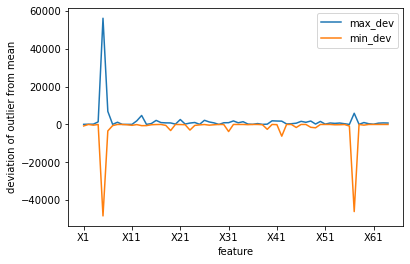

In [20]:
def visualize_outliers_dev(describe_df):
    a = describe_df.T.copy()
    a['max_dev'] = (a['max'] - a['mean']) / abs(a['mean'])
    a['min_dev'] = (a['min'] - a['mean']) / abs(a['mean'])
    a[['max_dev', 'min_dev']].plot(xlabel='feature', ylabel='deviation of outlier from mean')
    return a
mmm = visualize_outliers_dev(feature_describe)    

In [21]:
max_sort_s = mmm['max_dev'].sort_values(ascending=False)[:2]
min_sort_s = mmm['min_dev'].sort_values()[:2]
for n in range(2):
    print('The top {} largest max deviation is witnessed in feature {}, the max deviation is {:.2f}.'.format(n + 1, max_sort_s.index[n], max_sort_s.values[n]))
for n in range(2):
    print('The bottom {} smallest min deviation is witnessed in feature {}, the min deviation is {:.2f}.'.format(n + 1, min_sort_s.index[n], min_sort_s.values[n]))

The top 1 largest max deviation is witnessed in feature X5, the max deviation is 56143.73.
The top 2 largest max deviation is witnessed in feature X6, the max deviation is 6913.35.
The bottom 1 smallest min deviation is witnessed in feature X5, the min deviation is -48344.48.
The bottom 2 smallest min deviation is witnessed in feature X57, the min deviation is -46056.11.


The outcome still concludes existence of "true" outliers irrelevant to the number's scale. **This indicates that I should later develop methods to contain the outliers, in containing the extreme number's deviation from mean rather than its absolute number(after all it will be well handled by scaling).**

### B.4 Class imbalance

It is a common sense that bankruptcy is not a very popular case. This means that for our dataset, the positive samples can be very few and thus contributing to a dataset of class imbalance. I want to confirm this assumption and explore into how imbalance the data can be.

In [22]:
print('The fraction of the positive examples in the training dataset is {:.2%}, meaning there are only {} positive samples out of {} training samples'.format(
    np.sum(y_train) / y_train.shape[0], np.sum(y_train), y_train.shape[0]))

The fraction of the positive examples in the training dataset is 6.34%, meaning there are only 275 positive samples out of 4336 training samples


The conclusion is that the dataset is extremely imbalance. Such imbalance, if not handled, will extremely undermine classifier's decision. **This indicates that I should later develop methods to handle class imbalance.**

### B.5 Dimensions and features' correlation

There are up to 64 features in the dataset's original version. Such high dimension can negatively influence classifier's decision and cause problems like overfitting. Below I take a look at the correlation among the 64 features.

In [23]:
X_train_df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
X1,1.000000,-0.898519,0.839526,0.012815,0.001322,0.174349,0.997553,0.009287,-0.162855,0.848484,...,0.036987,0.071575,0.021062,-0.069790,0.000097,0.001512,-0.079281,-0.061821,0.014135,-0.008170
X2,-0.898519,1.000000,-0.902511,-0.013815,-0.009314,-0.181981,-0.894427,-0.018622,0.195858,-0.954795,...,-0.056020,-0.065099,-0.005014,0.066849,0.006438,-0.000550,0.051476,0.067183,-0.017389,0.023564
X3,0.839526,-0.902511,1.000000,0.019016,0.005321,0.159641,0.836230,0.015433,-0.141138,0.926933,...,0.053647,0.050392,0.003707,-0.043851,-0.005408,0.001516,-0.047824,-0.071960,0.022908,-0.005833
X4,0.012815,-0.013815,0.019016,1.000000,0.000563,-0.000456,0.013112,0.912536,-0.008771,0.014003,...,-0.000380,-0.000209,0.001295,-0.002145,-0.002046,0.003631,-0.003387,-0.002551,0.980676,0.012236
X5,0.001322,-0.009314,0.005321,0.000563,1.000000,0.000700,0.001096,0.001244,-0.054663,0.011746,...,0.002132,0.011357,0.000155,-0.010360,-0.000872,0.003790,-0.003371,-0.121503,0.000433,-0.001060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X60,0.001512,-0.000550,0.001516,0.003631,0.003790,-0.007080,0.002351,0.007312,0.018204,0.001121,...,-0.007201,-0.012781,0.003725,0.001649,-0.001516,1.000000,-0.005020,-0.002325,0.021723,0.014299
X61,-0.079281,0.051476,-0.047824,-0.003387,-0.003371,-0.034930,-0.079339,-0.003638,0.118490,-0.049008,...,-0.012557,-0.006603,-0.001511,0.001700,0.002195,-0.005020,1.000000,-0.003651,0.003779,-0.001606
X62,-0.061821,0.067183,-0.071960,-0.002551,-0.121503,-0.012426,-0.062551,-0.001612,-0.034140,-0.071248,...,-0.012435,-0.542876,-0.002710,0.678845,-0.000392,-0.002325,-0.003651,1.000000,-0.004823,-0.003469
X63,0.014135,-0.017389,0.022908,0.980676,0.000433,0.000037,0.014979,0.894551,0.019280,0.017662,...,-0.001169,0.002932,0.001717,-0.007338,-0.001944,0.021723,0.003779,-0.004823,1.000000,0.013827


The correlation table implies that there are actually many features mutually correlated with each other. In fact, some of these features' correlation can be up to 90%. **Such magnitude and significance of features' correlation indicates the necessity and benefits of dimensionality reduction.**

## C. Prepare the Data

### C.1 Cleaning Data

Here I handle the problem of missing data by imputing those with `NaN` values.

I do not impute with mean of dataset because I have observed the existence of outlier so mean's computation at this time would be distorted.

SimpleImputer(strategy='median')

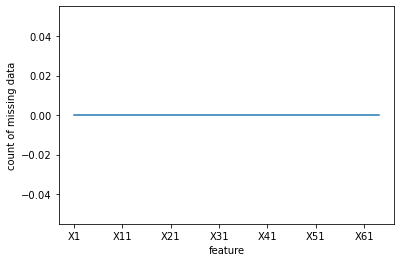

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X_train)
X_train = imp.transform(X_train)

X_train_df = pd.DataFrame(X_train)
X_train_df.columns = original_features

visualize_missing_data(X_train_df)

### C.2 Handling non-numeric features/targets

There is none non-numeric features in this dataset.

### C.3 Scaling & Outlier clipping & Normalization

When it comes to scaling and outlier, an interesting and also important issue rises: which step should I do first? That is: should I scale the data first and then clip the outliers, or should I clip the outliers and then scale the data? The argument for the first one is that if the scale is significantly different then it is very difficult to determine an outlier to clip in practice. The argument for the second is that the existence of outlier should significantly affect many scalers such as `StandardScaler()`, `MaxMinScaler()`...

Below, I rise 2 proposals dealing with this issue. These 2 are alternative.

**Proposal 1: Outlier clipping first and then scaler**

This proposal assumes that outliers would affect scaler and should be clipped before scaling. Thus, a method to implement this is that for each feature I assume values go beyond or below a certain threshold (which is determined by a certain quantile) as outliers and then set these outliers to be that threshold. After clipping the threshold, I then call `StandardScaler()` to scale the dataset.

**Proposal 2: Use scaler unaffected by outliers**

I develop the following idea from `sklearn`'s documentation. The idea is pretty simple: **I make the process of scaling and the process of outlier clipping independent from each other, so the final goal is that I first use a method to scale the features which is unaffected by any outlier, and then after all features are in the similar scale I do outlier clipping uniformly.** The specific method that I use provided by sklearn is named `RobustScaler()`. Slightly different from `StandardScaler()`, this transforme transforms the features by reducing their **median** rather than mean and then divide by **range within a certain quartile** rather than standard deviation. Since it is impossible for outlier to affect either median or range within a certain quartile of a given dataset, this scaler cannot be influenced by outliers.

Note: There are built-in transformers in sklearn that can scale data without being affected by outliers and collapse outliers at the same time within a single `fit()`. However I reject these functions because they are non-linear transformations and may potentially undermine linear relationship and correlation between features thus causing unknown side effects against PCA, and also because they forcefully transform the dataset into either Gaussian or Uniform distribution, which seems too arbitrary assumptions to me.

**Implementation for proposal 1**

STEP1: outlier clipping

First I take a look at the potential outliers.

The top 1 largest max is witnessed in feature X32, the max is 4277200.00.
The top 2 largest max is witnessed in feature X55, the max is 4212200.00.
The top 3 largest max is witnessed in feature X15, the max is 1341700.00.
The bottom 1 smallest min is witnessed in feature X5, the min is -1076400.00.
The bottom 2 smallest min is witnessed in feature X15, the min is -466770.00.
The bottom 3 smallest min is witnessed in feature X55, the min is -419200.00.


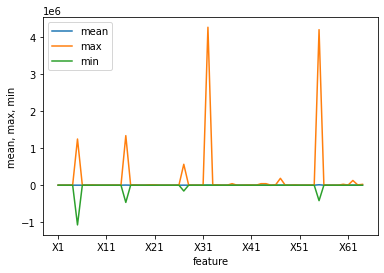

In [25]:
X_train1 = X_train.copy()
X_train_df1 = X_train_df.copy()

mmm1 = visualize_outliers(X_train_df1.describe())
max_sort_s1 = mmm1['max'].sort_values(ascending=False)[:3]
min_sort_s1 = mmm1['min'].sort_values()[:3]
for n in range(3):
    print('The top {} largest max is witnessed in feature {}, the max is {:.2f}.'.format(n + 1, max_sort_s1.index[n], max_sort_s1.values[n]))
for n in range(3):
    print('The bottom {} smallest min is witnessed in feature {}, the min is {:.2f}.'.format(n + 1, min_sort_s1.index[n], min_sort_s1.values[n]))

Below I plot box to examine range for each feature.

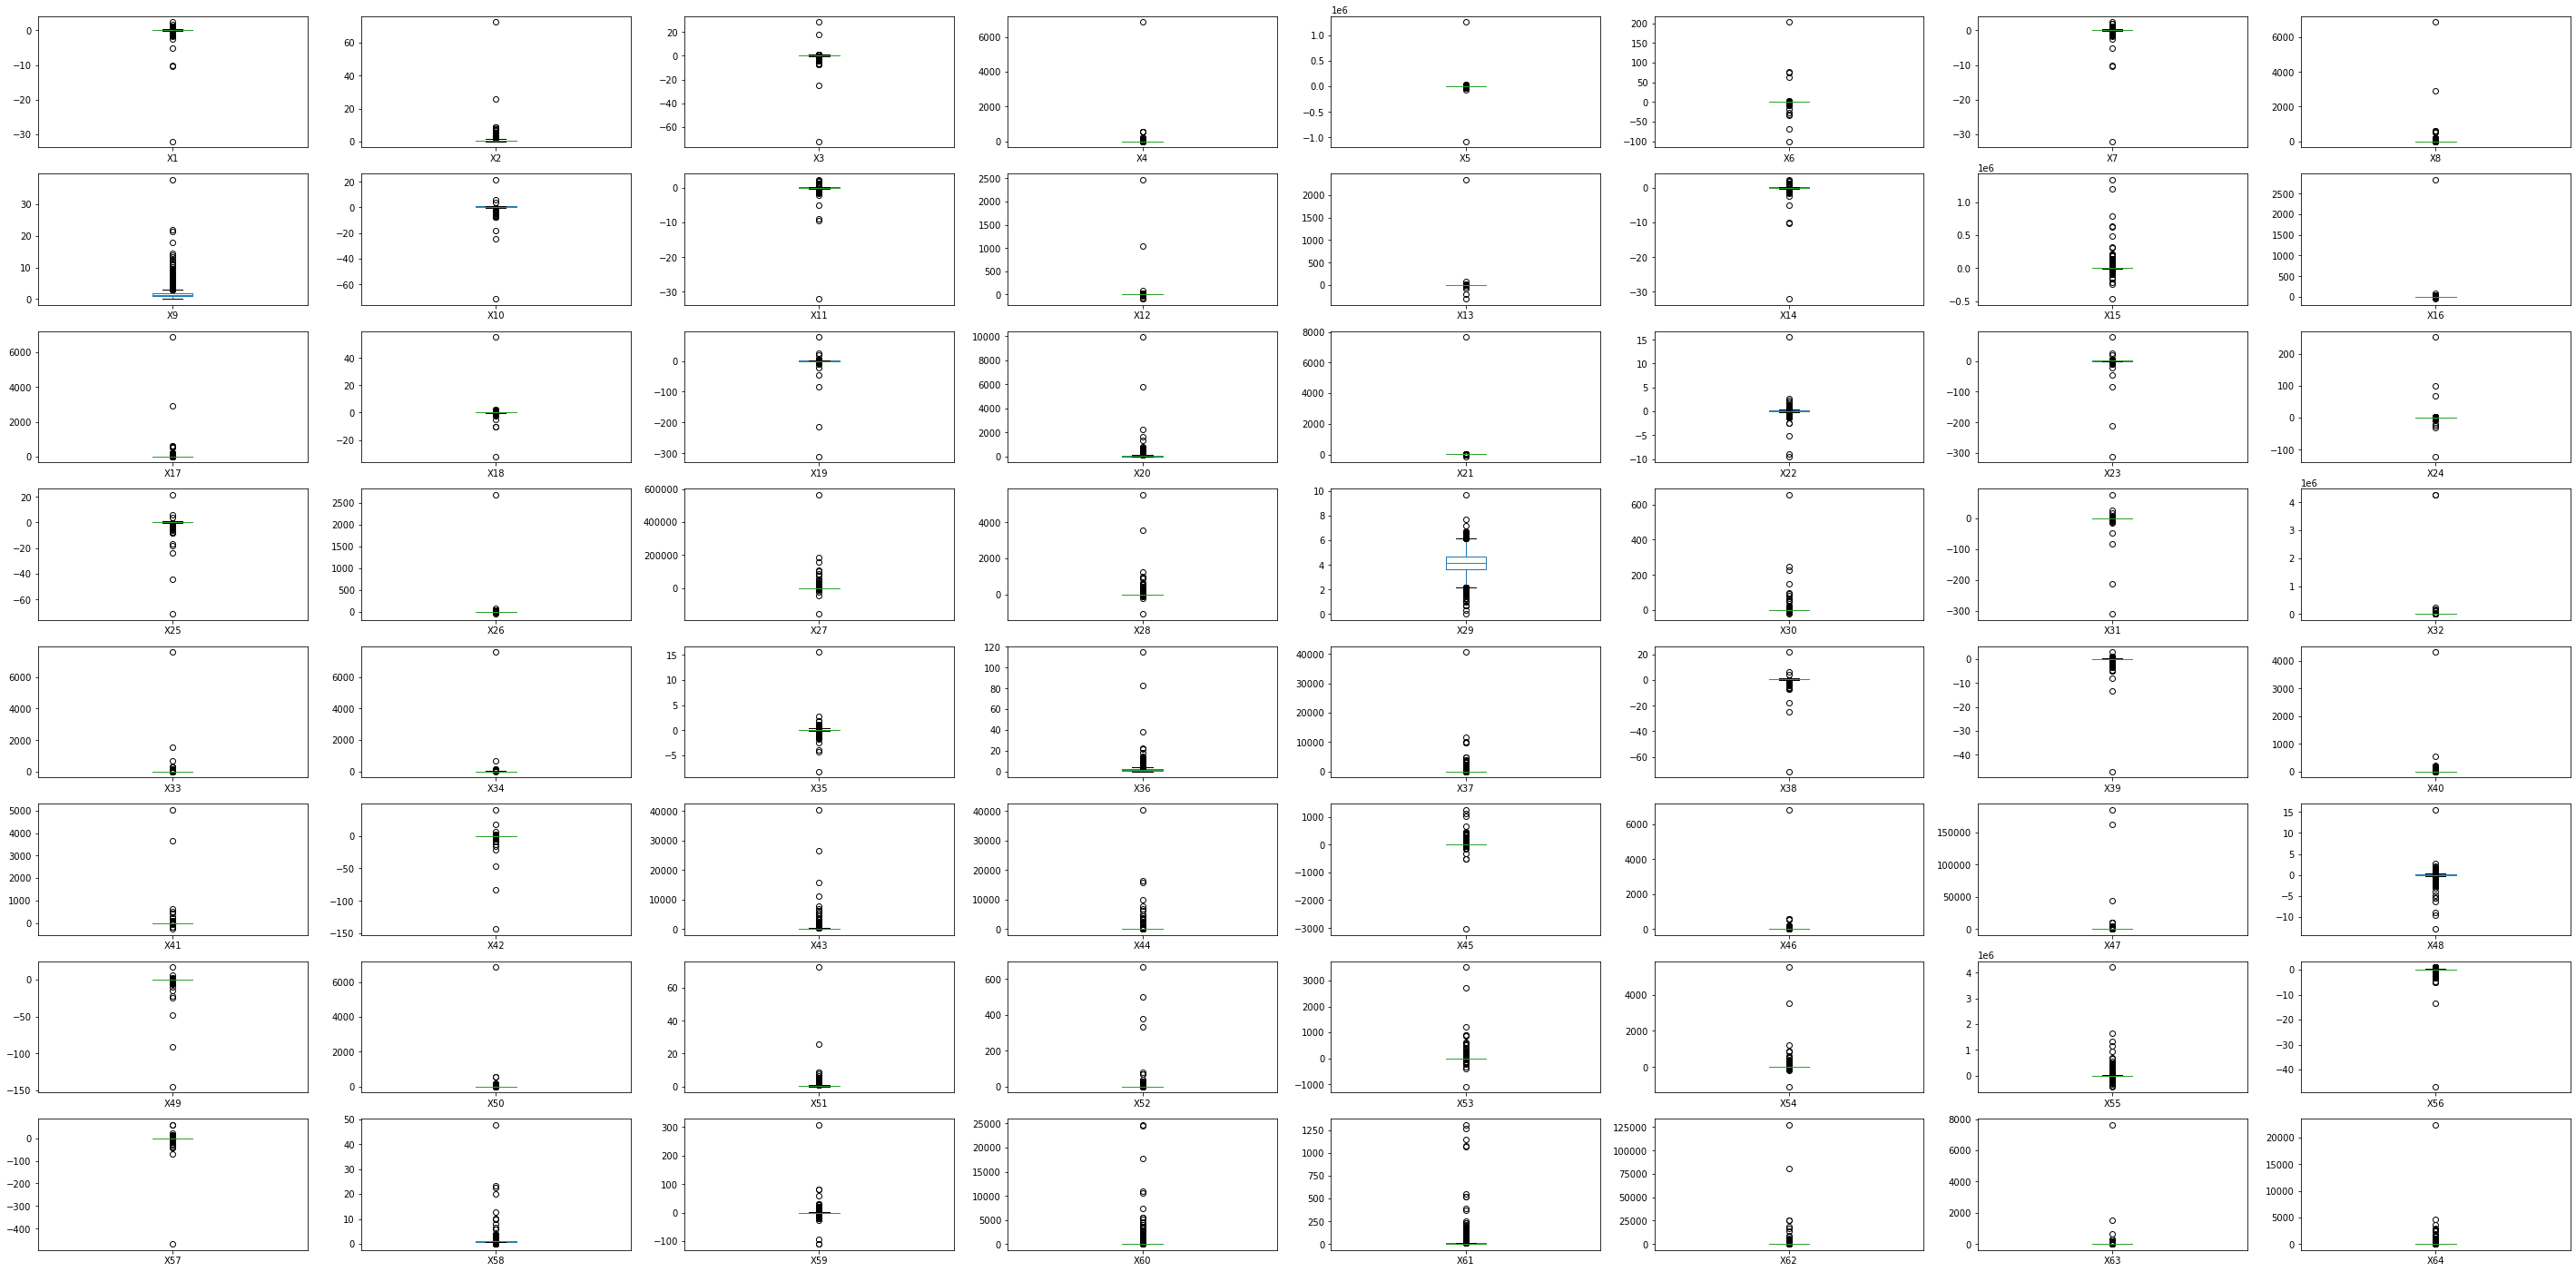

In [26]:
fig,ax=plt.subplots(8,8, figsize=(50,25))
for n, f in enumerate(X_train_df.columns):
    _ = X_train_df[f].plot(kind='box', ax=ax[n // 8][n - 8 * (n // 8)])

The outliers are extreme. Even if they are in different scale, I can still spot a lot of extreme values from the individual distribution of each feature. I have to clip them before I use a `StandardScaler()`. I hereby implement a class named `OutlierClipper1` to clip outliers above certain threshold. This class is implemented with `fit` and `transform` method so that it can be accepted by `sklearn`'s `pipeline` class. This transformer actually does not need a `fit` method, for the threshold is determined by human, thus no cheating or data leakage issues should be concerned. I determine the first 10% and last 10% values to be the outlier and simply set them to be the value of the 10% quantile and the 90% quantile. In this context, I do clip extreme values and the number of values get affected is not small (20%).

In [27]:
class OutlierClipper1():
    def __init__(self):
        self.ther = []
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        for i in X_df.columns:
            self.ther.append((X_df[i].quantile(0.10), X_df[i].quantile(0.90)))
        return self
    def transform(self, X):
        X_df = pd.DataFrame(X)
        for i in X_df.columns:
            low, high = self.ther[i]
            X_df[i] = np.where(X_df[i] > high, high, X_df[i])
            X_df[i] = np.where(X_df[i] < low, low, X_df[i])
        
        return X_df.values

After implement the `OutlierClipper1()` we can see the outliers have been largely contained even though some of them can still be extreme if we plot all features into one chart because their scale are still different from each other significantly.

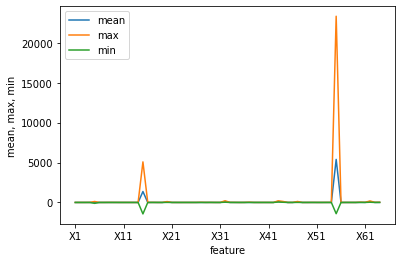

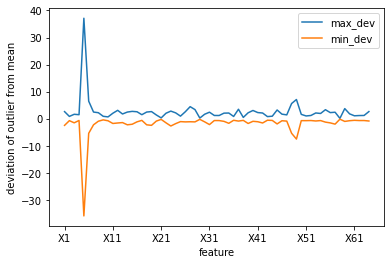

In [28]:
clipper1 = OutlierClipper1()
clipper1.fit(X_train1)
X_train1 = clipper1.transform(X_train1)
X_train_df1 = pd.DataFrame(X_train1, columns=original_features)

_ = visualize_outliers(X_train_df1.describe())
_ = visualize_outliers_dev(X_train_df1.describe())

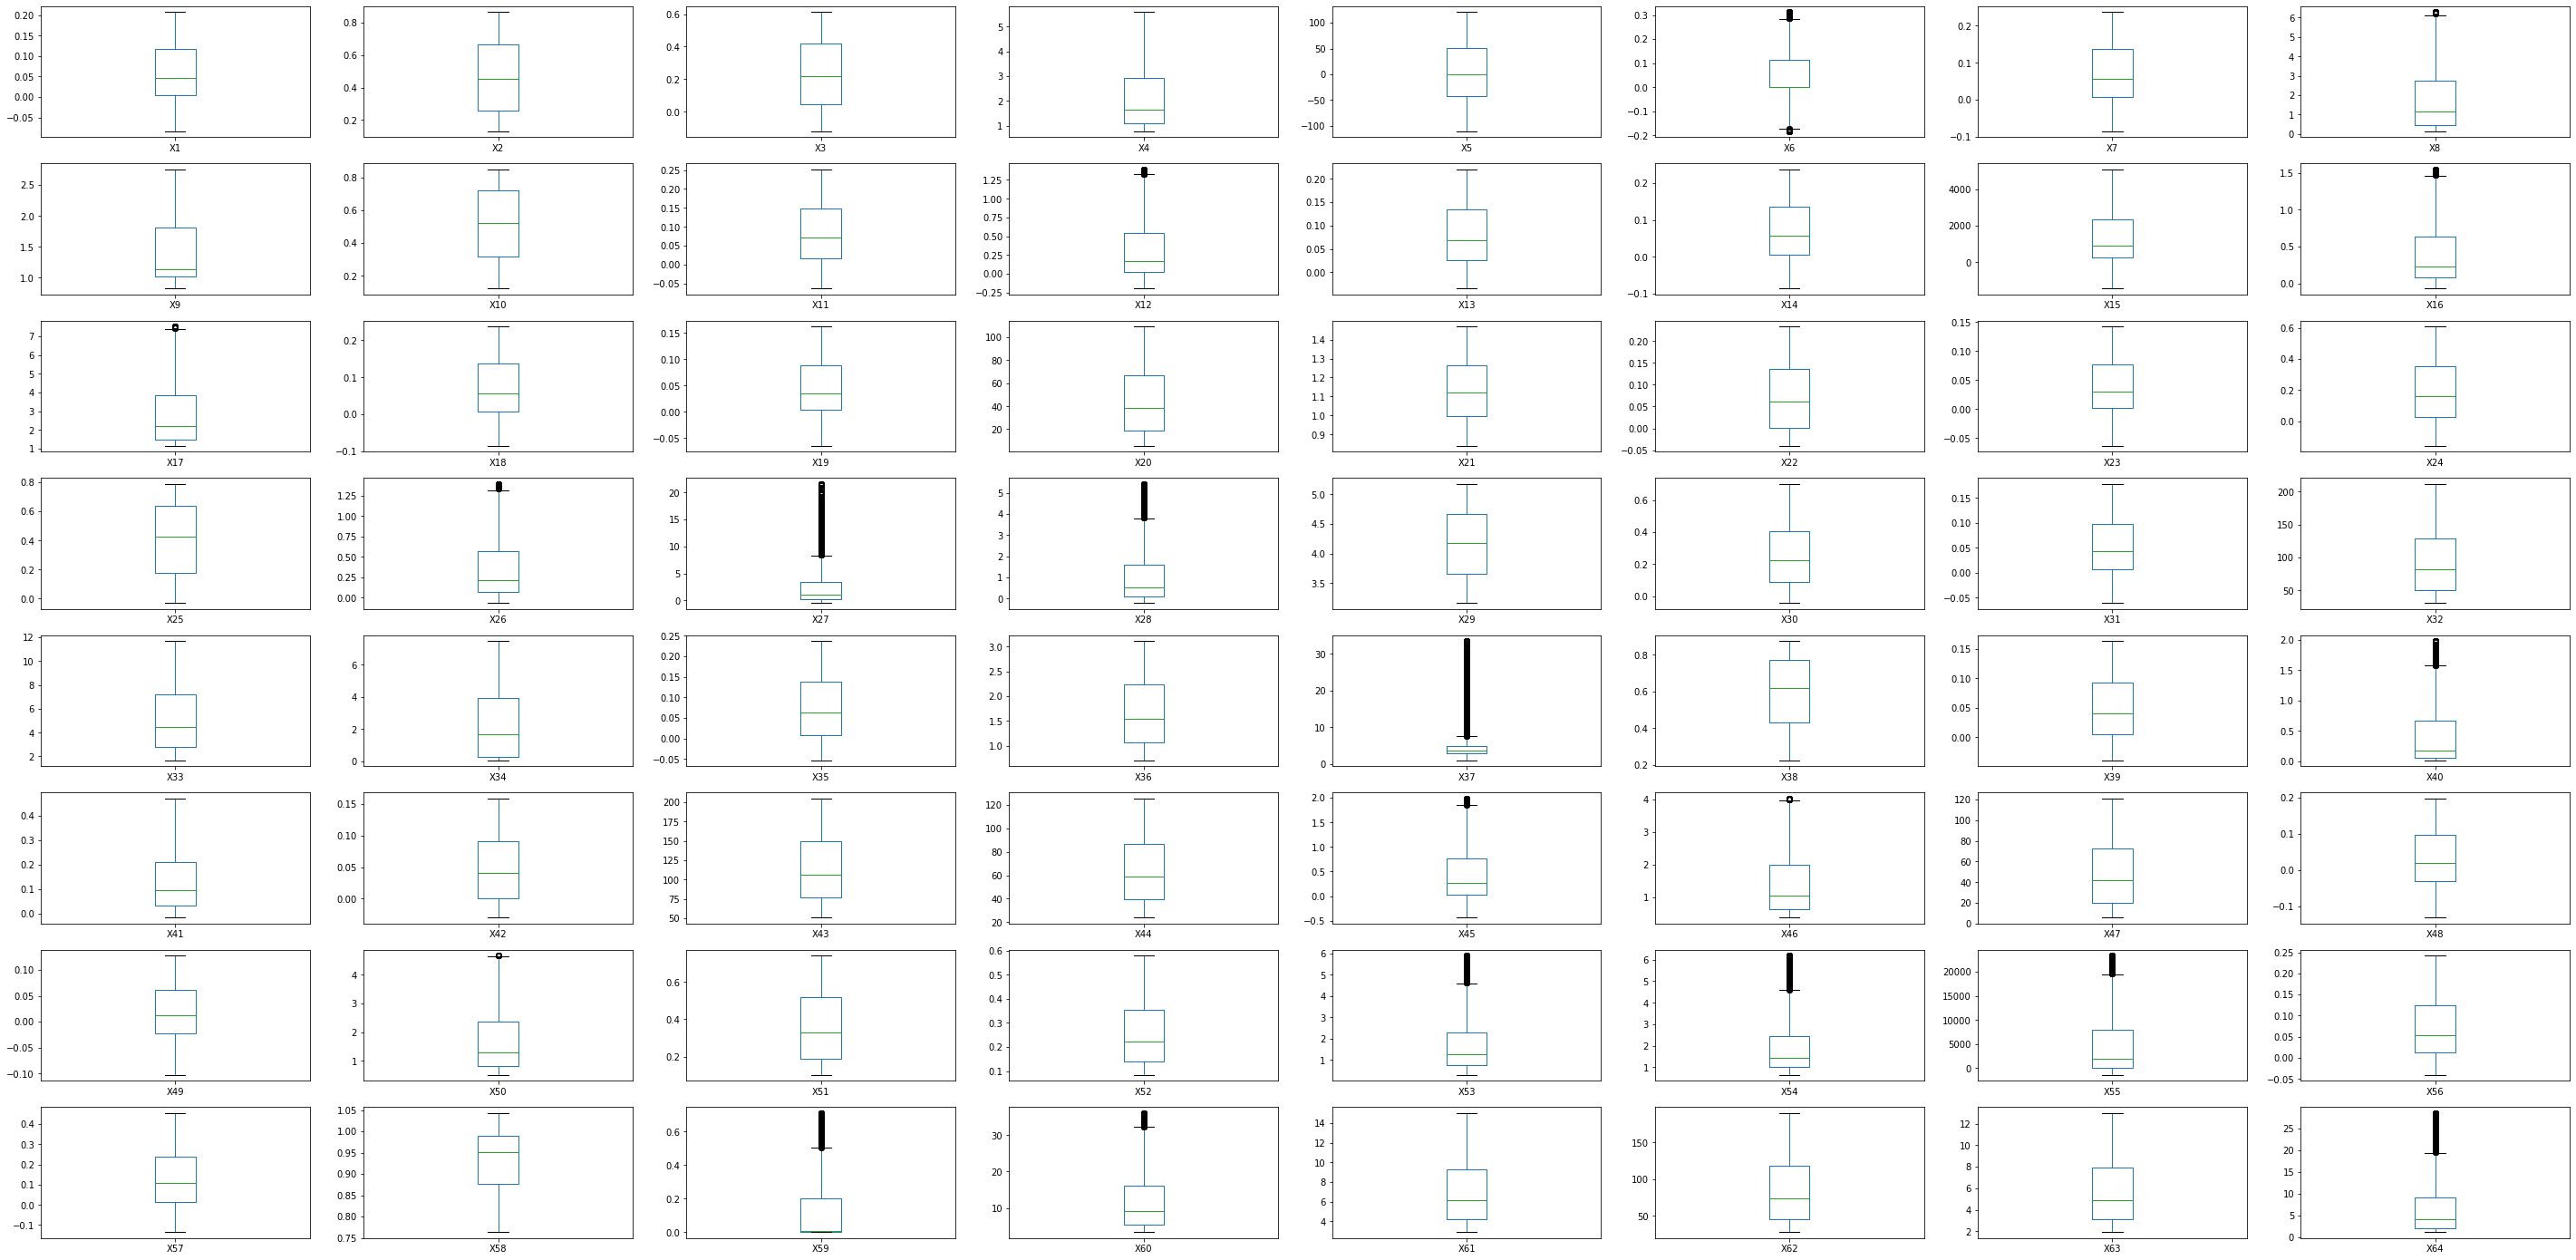

In [29]:
visualize_feature_distribution(X_train_df1)

STEP2: scaling

Since outliers have been clipped, it is safe then to implement `Standardscaler()` to scale the data.

StandardScaler()

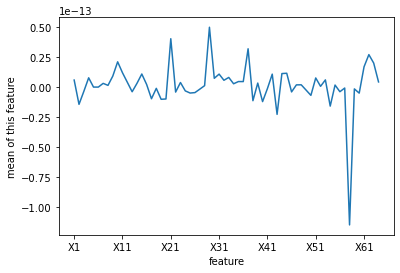

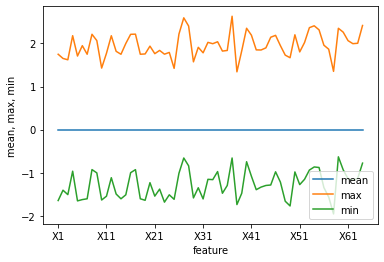

In [30]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train1)
X_train1 = scaler1.transform(X_train1)
X_train_df1 = pd.DataFrame(X_train1, columns=original_features)

visualize_data_scale(X_train_df1.describe())
_ = visualize_outliers(X_train_df1.describe())

It is apparent from this chart that now I have achieved a dataset with similar scale whose outliers have been contained.

STEP3: normalization

After ourlizer clipping and scaling, I implement normalization over the data so that samples will be normalized individually to unit norm.

Normalizer()

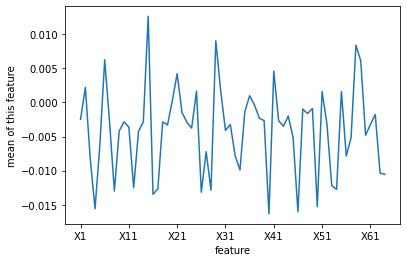

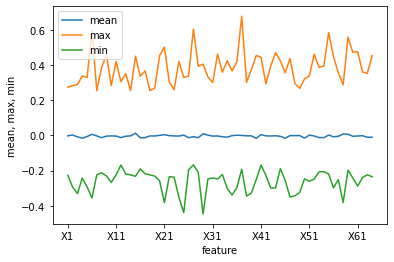

In [31]:
from sklearn.preprocessing import Normalizer
norm1 = Normalizer()
norm1.fit(X_train1)
X_train1 = norm1.transform(X_train1)
X_train_df1 = pd.DataFrame(X_train1, columns=original_features)
visualize_data_scale(X_train_df1.describe())
_ = visualize_outliers(X_train_df1.describe())

**Implementation for proposal 2**

STEP1: scaling

First I call `RobustScaler()` to scale the data.

RobustScaler()

The top 1 largest mean is witnessed in feature X27, the mean is 122.02.
The top 2 largest mean is witnessed in feature X32, the mean is 27.95.


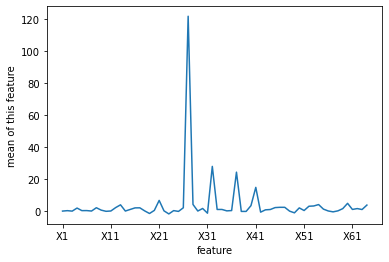

In [32]:
from sklearn.preprocessing import RobustScaler
X_train2 = X_train.copy()
X_train_df2 = X_train_df.copy()

scaler2 = RobustScaler()
scaler2.fit(X_train2)
X_train2 = scaler2.transform(X_train2)
X_train_df2 = pd.DataFrame(X_train2, columns=original_features)

visualize_data_scale(X_train_df2.describe())

mean_sort_s2 = X_train_df2.describe().T['mean'].sort_values(ascending=False)[:2]
for n in range(2):
    print('The top {} largest mean is witnessed in feature {}, the mean is {:.2f}.'.format(n + 1, mean_sort_s2.index[n], mean_sort_s2.values[n]))

After scaling, I take a look at the outliers.

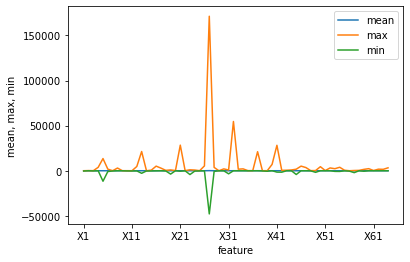

In [33]:
mmm2 = visualize_outliers(X_train_df2.describe())

In [34]:
max_sort_s2 = mmm2['max'].sort_values(ascending=False)[:3]
min_sort_s2 = mmm2['min'].sort_values()[:3]
for n in range(3):
    print('The top {} largest max is witnessed in feature {}, the max is {:.2f}.'.format(n + 1, max_sort_s2.index[n], max_sort_s2.values[n]))
for n in range(3):
    print('The bottom {} smallest min is witnessed in feature {}, the min is {:.2f}.'.format(n + 1, min_sort_s2.index[n], min_sort_s2.values[n]))

The top 1 largest max is witnessed in feature X27, the max is 171218.83.
The top 2 largest max is witnessed in feature X32, the max is 54581.53.
The top 3 largest max is witnessed in feature X21, the max is 28366.79.
The bottom 1 smallest min is witnessed in feature X27, the min is -47840.85.
The bottom 2 smallest min is witnessed in feature X5, the min is -11618.42.
The bottom 3 smallest min is witnessed in feature X23, the min is -4226.98.


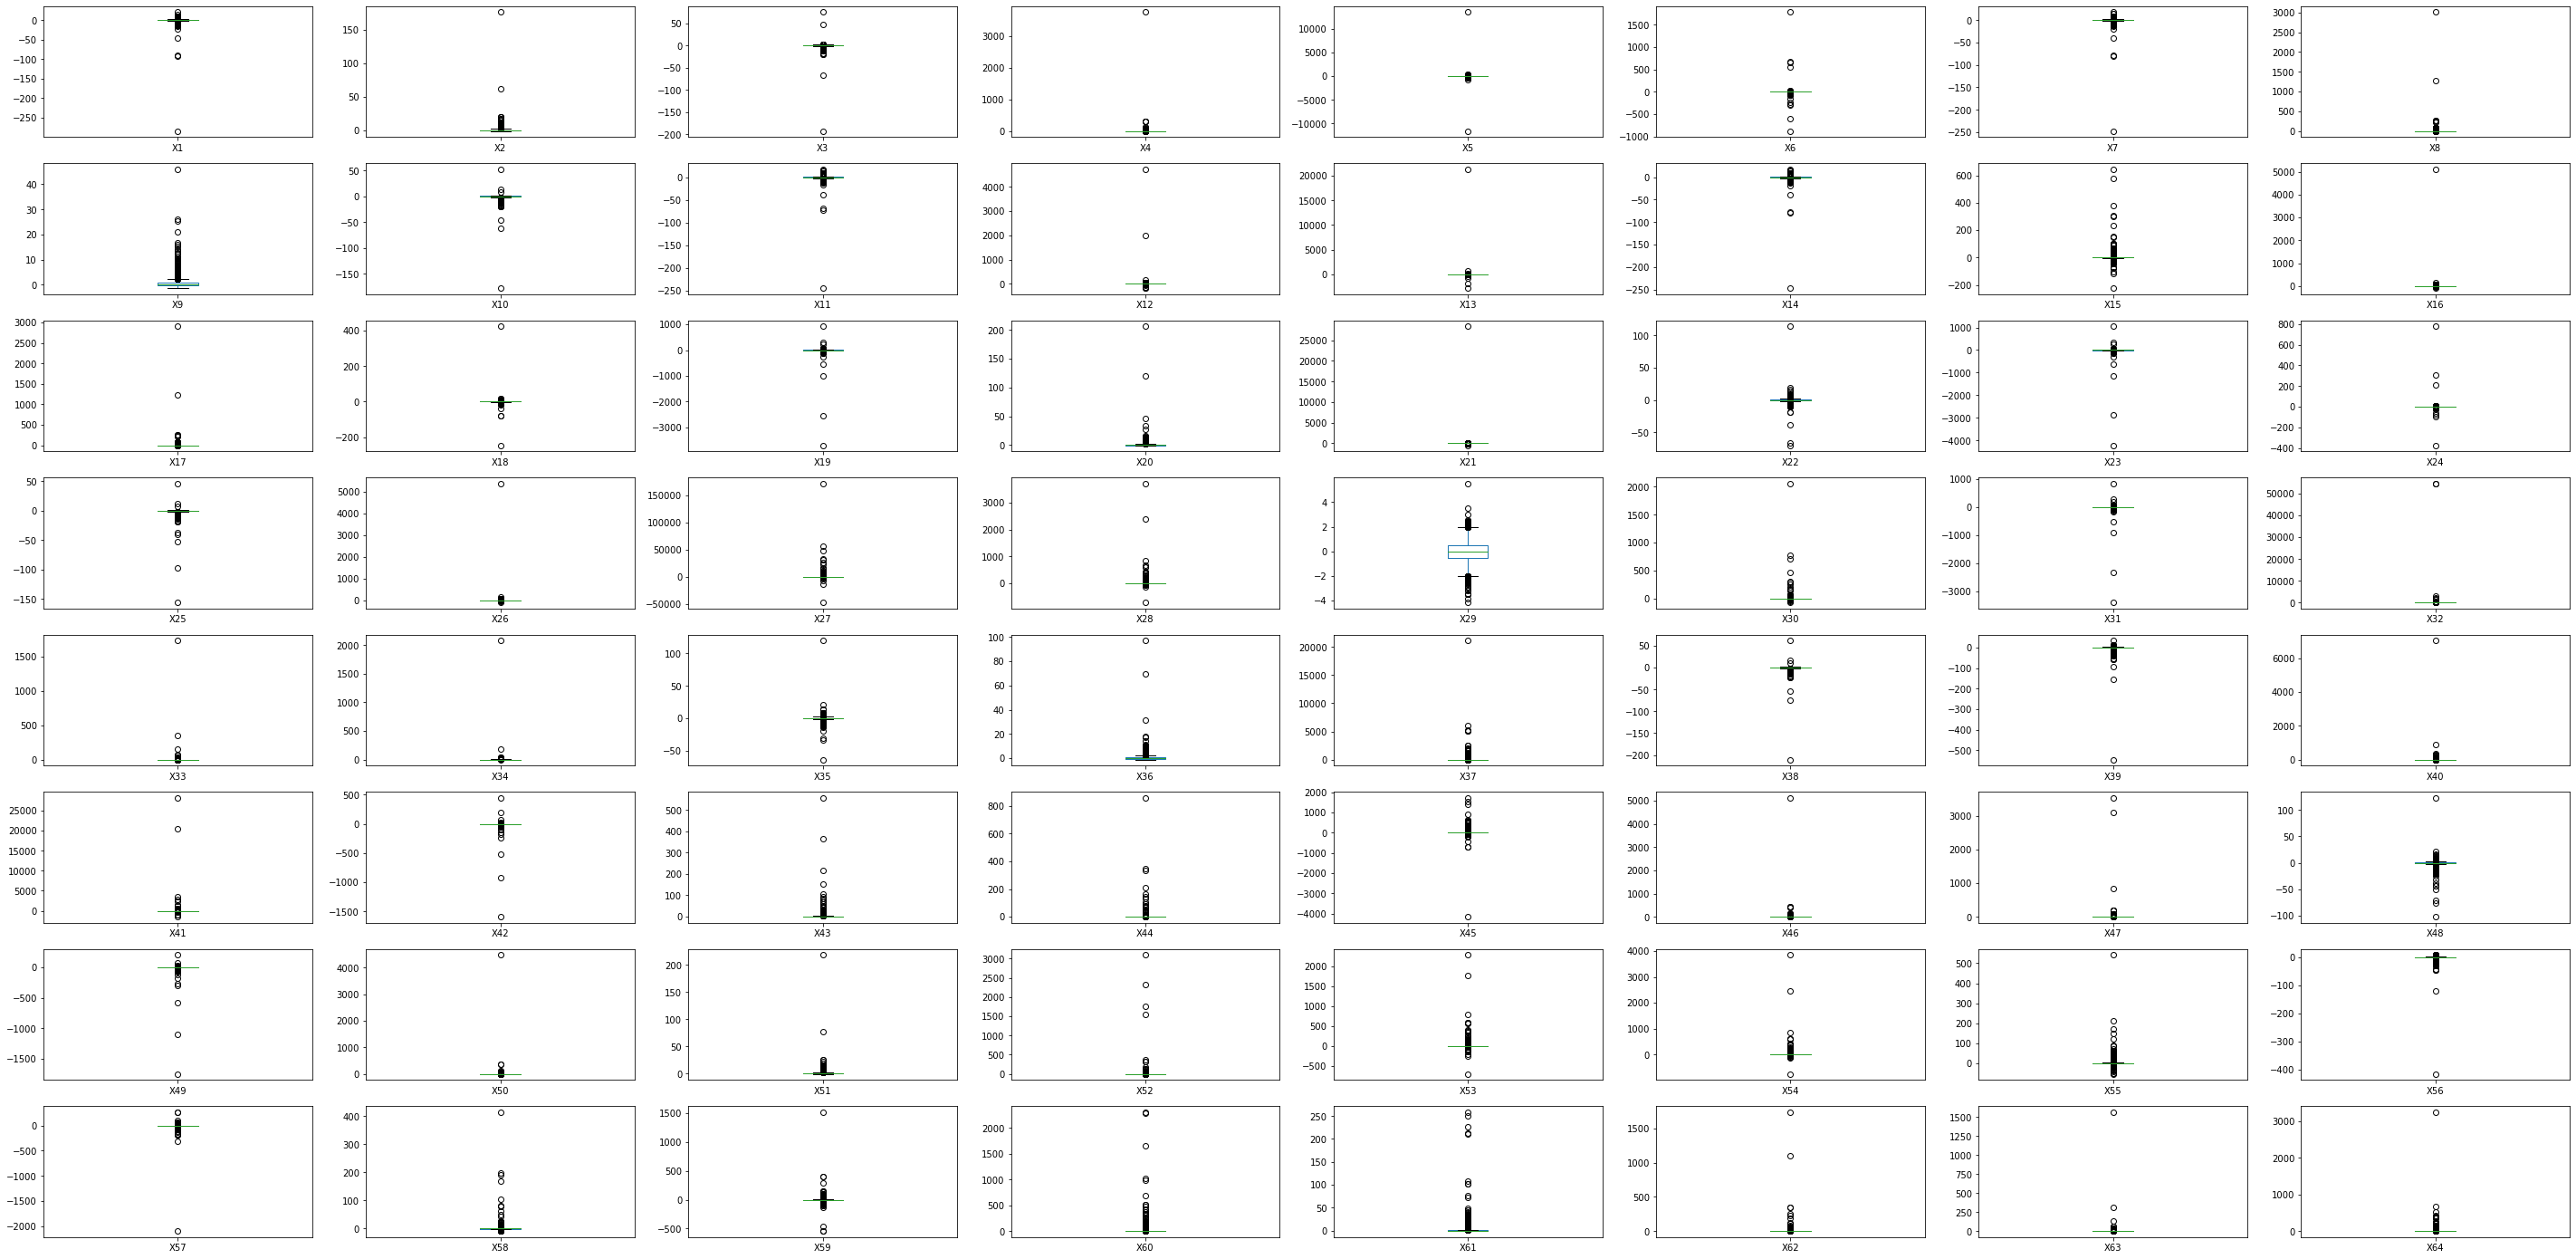

In [35]:
visualize_feature_distribution(X_train_df2)

STEP2: outlier clipping

From the plot above, I conclude that even after scaling, some outliers are still extreme and should be clipped manually. I hereby still use the transformer class named `OutlierClipper1()` to clip outliers above certain thershold.

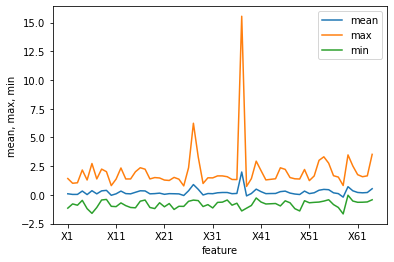

In [36]:
clipper2 = OutlierClipper1()
clipper2.fit(X_train2)
X_train2 = clipper2.transform(X_train2)
X_train_df2 = pd.DataFrame(X_train2, columns=original_features)

_ = visualize_outliers(X_train_df2.describe())

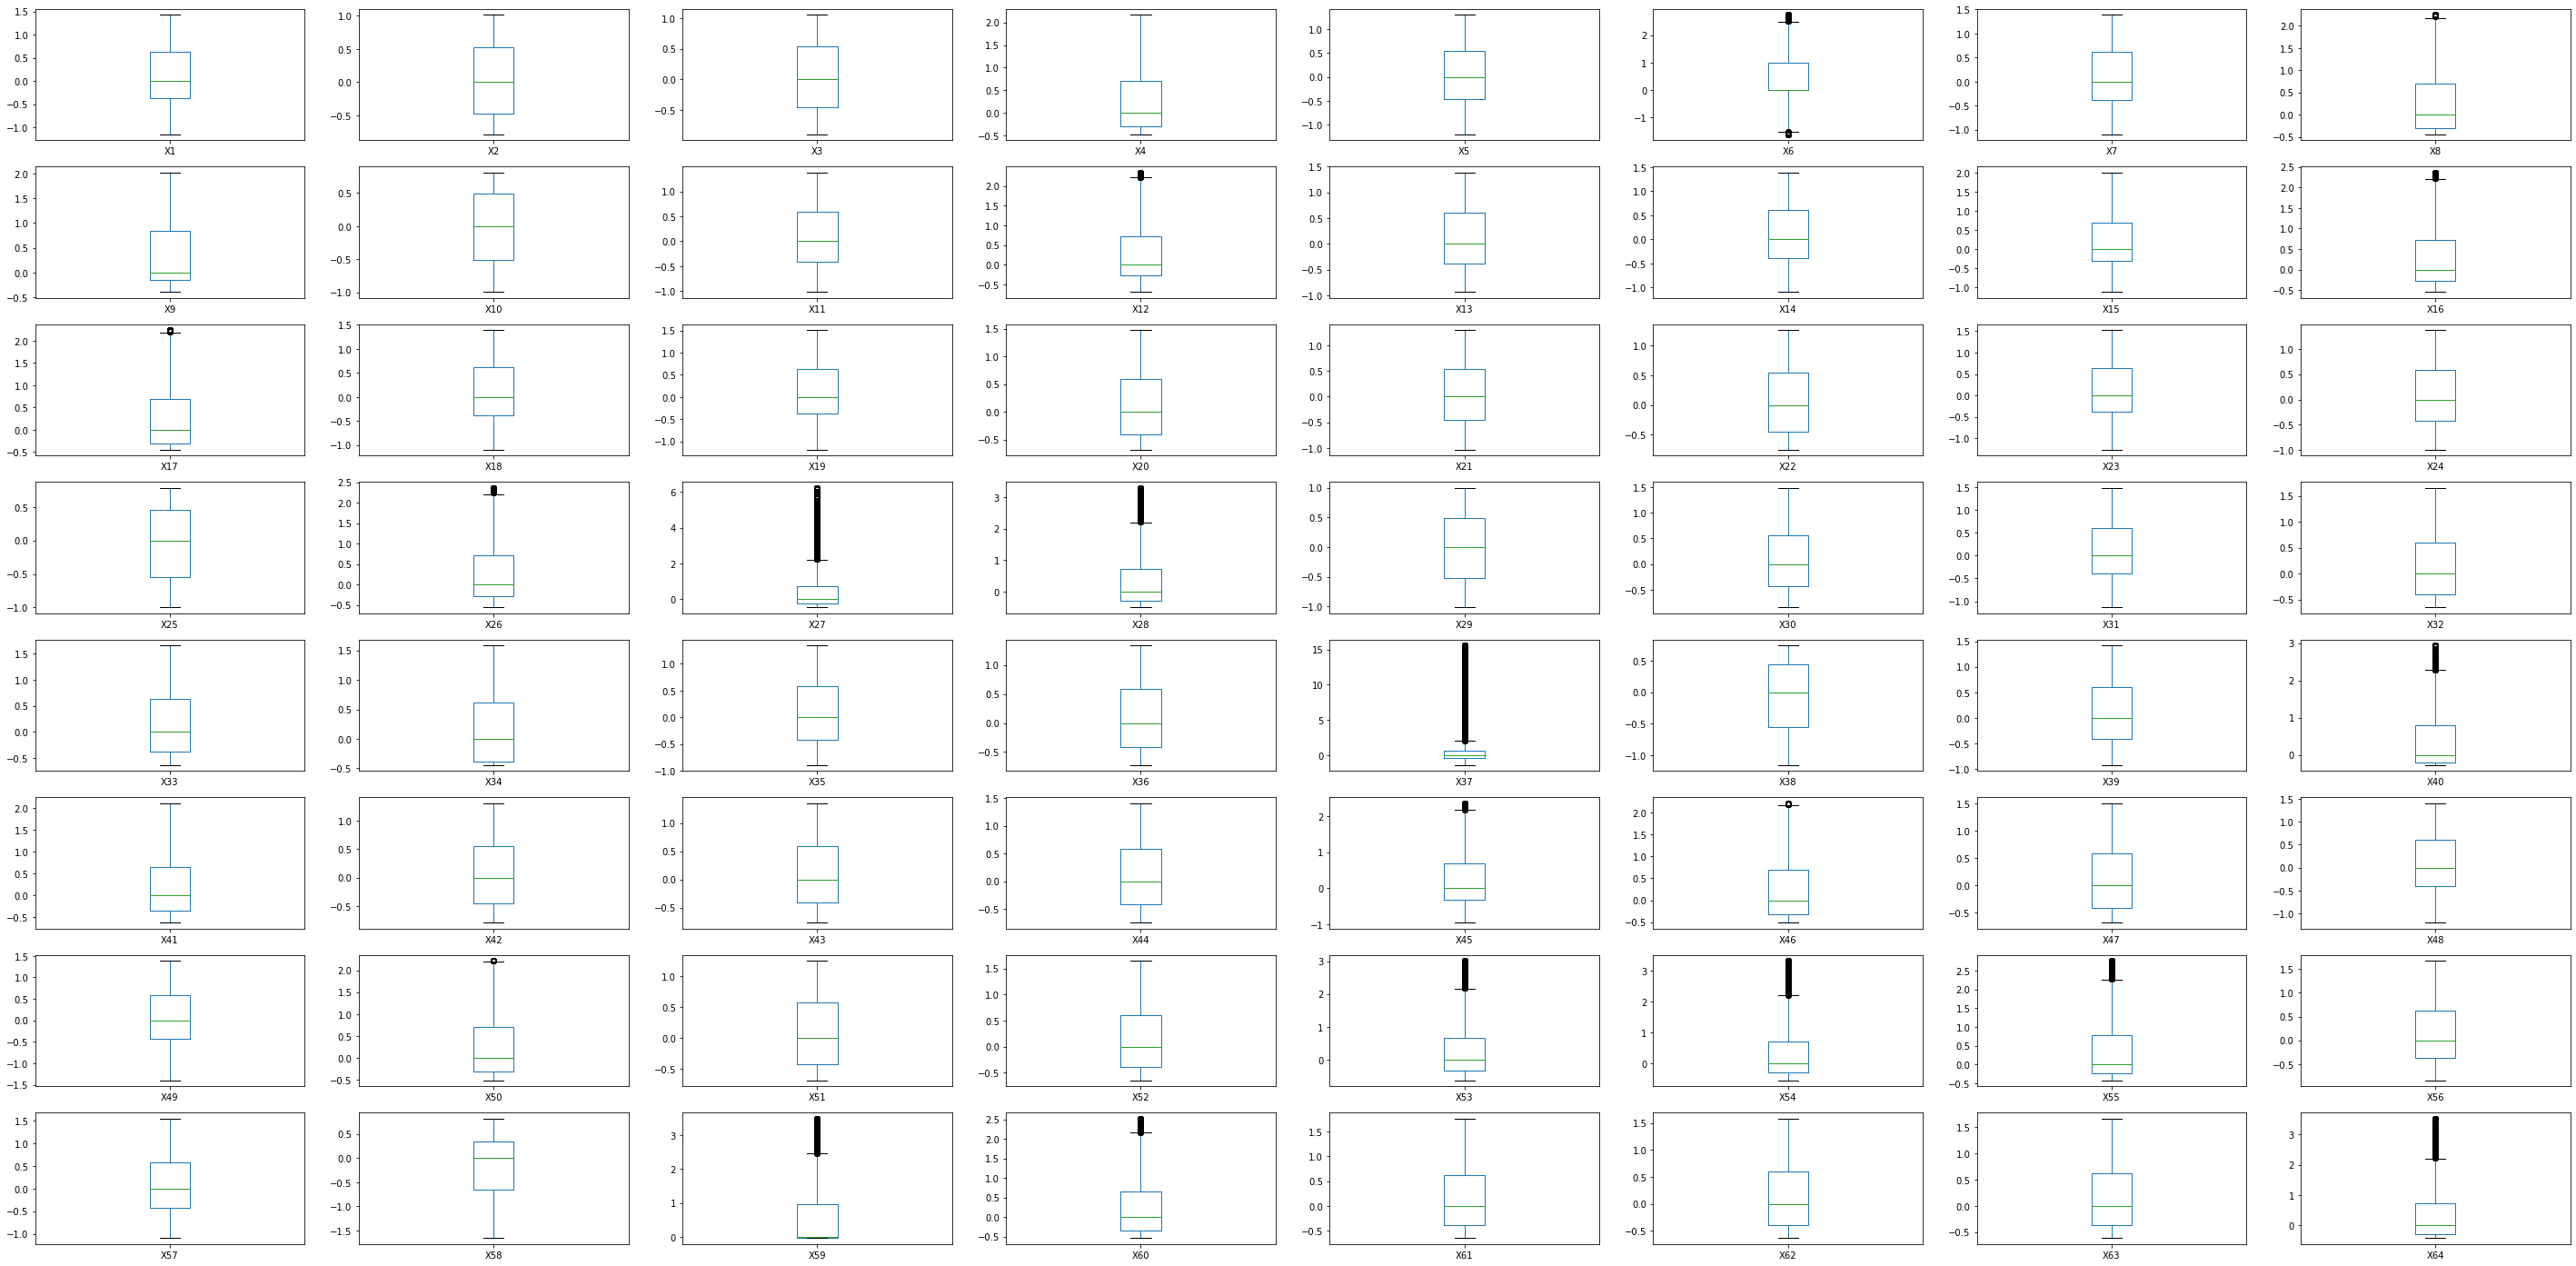

In [37]:
visualize_feature_distribution(X_train_df2)

It is apparent from this chart that now I have achieved a dataset with similar scale whose outliers have been contained. However, the extent to which the outliers get contained is rather limited.

STEP3: normalization

After ourlizer clipping and scaling, I implement normalization over the data so that samples will be normalized individually to unit norm.

Normalizer()

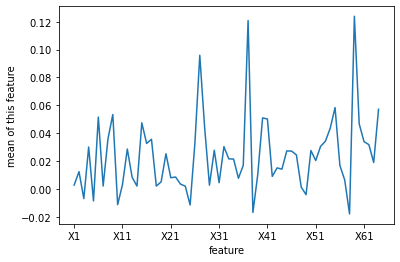

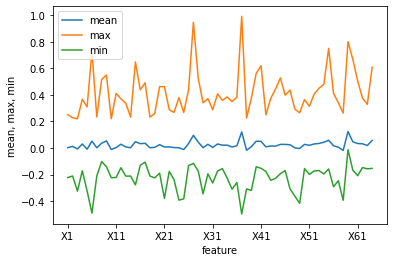

In [38]:
from sklearn.preprocessing import Normalizer
norm2 = Normalizer()
norm2.fit(X_train2)
X_train2 = norm2.transform(X_train2)
X_train_df2 = pd.DataFrame(X_train2, columns=original_features)
visualize_data_scale(X_train_df2.describe())
_ = visualize_outliers(X_train_df2.describe())

### C.5 Transformation: PCA

As I have detected correlation among features, I run PCA over the 2 alternatives separately to reduce dimensionality. As PCA itself is also very sensitive to data pre-processing, PCA's outcome may somehow indicate which alternative is more promising.

PCA(n_components=0.95)

(4336, 23)
To capture 95.0% of variance we need 23 synthetic features.


PCA(n_components=0.95)

(4336, 21)
To capture 95.0% of variance we need 21 synthetic features.


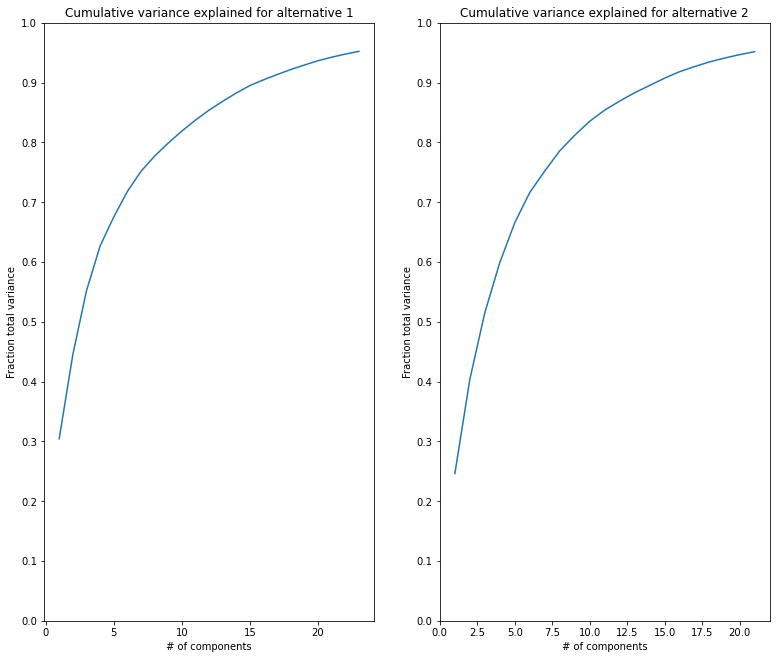

In [39]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=0.95)
pca1.fit(X_train1)
X_train_reduced1 = pca1.transform(X_train1)
print(X_train_reduced1.shape)
cumsum1 = np.cumsum(pca1.explained_variance_ratio_)
x1  = range(1, 1 + cumsum1.shape[0])
variance_goal_pct1 = 0.95
fig = plt.figure(figsize=(13,11))
ax  = fig.add_subplot(1,2,1)
_ = ax.plot(x1, cumsum1)
_ = ax.set_title("Cumulative variance explained for alternative 1")
_ = ax.set_xlabel("# of components")
_ = ax.set_ylabel("Fraction total variance")
_= ax.set_yticks( np.linspace(0,1,11)  )

features_for_goal1 = np.argmax(cumsum1 >= variance_goal_pct1) + 1
print("To capture {}% of variance we need {} synthetic features.".format(variance_goal_pct1 * 100, features_for_goal1))


pca2 = PCA(n_components=0.95)
pca2.fit(X_train2)
X_train_reduced2 = pca2.transform(X_train2)
print(X_train_reduced2.shape)
cumsum2 = np.cumsum(pca2.explained_variance_ratio_)
x2  = range(1, 1 + cumsum2.shape[0])
variance_goal_pct2 = 0.95        
ax  = fig.add_subplot(1,2,2)
_ = ax.plot(x2, cumsum2)
_ = ax.set_title("Cumulative variance explained for alternative 2")
_ = ax.set_xlabel("# of components")
_ = ax.set_ylabel("Fraction total variance")
_= ax.set_yticks( np.linspace(0,1,11)  )

features_for_goal2 = np.argmax(cumsum2 >= variance_goal_pct2) + 1
print("To capture {}% of variance we need {} synthetic features.".format(variance_goal_pct2 * 100, features_for_goal2))

In fact, the PCA outcome shows that alternative 2 is more promising. As shown from the picture, using alternative 2 to pre-process data, the PCA process is able to conclude much less synthetic features than using alternative 1. This implies that, PCA can extract the same amount of information but incorporate them into much fewer features. As a result, PCA seems to benefit more from alternative 2.

While this outcome is promising, after all this is a non-label exploration and to determine whether alternative 2 is truly the better one, I still have to compare the 2 alternatives' effects on classifiers.

### C.6 Conclusion

From the discussions and explorations above, I push all data pre-processing and transformation process into a pipeline. To test which alternative of preparing data is better (that is to test proposal 1 and proposal 2 regarding scaler & outlier clipper), I separately push the 2 alternatives into 2 pipelines and combine them with logistic regression, support vector machine and random forest then finally run cross validation over these 2 pipelines with 3 different classifiers. I use these 3 to test because they are classical and they contain both linear and non-linear ensemble methods, which guarantee certain level of generalization of my conclusion.

The metric concludes that proposal 1, which implements `OutlierClipper1()` and then `StandardScaler()`, outperforms the other one. Thereby I determine this one to implement in the following procedures.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


transformers1= Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                              ('clipper', OutlierClipper1()),
                              ('scaler', StandardScaler()),
                              ('normer', Normalizer()),
                              ('pca', PCA(n_components=0.95))
                                ] )

transformers2= Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                              ('scaler', RobustScaler()),
                              ('clipper', OutlierClipper1()),
                               ('normer', Normalizer()),
                              ('pca', PCA(n_components=0.95))
                                ] )
# this one will be used later
transformers3= Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                              ('clipper', OutlierClipper1()),
                              ('scaler', StandardScaler()),
                              ('normer', Normalizer())
                                ] )

transformers4= Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                              ('scaler', RobustScaler()),
                              ('clipper', OutlierClipper1()),
                               ('normer', Normalizer())
                                ] )



from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(solver='liblinear', class_weight='balanced')

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", class_weight='balanced')

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')



from sklearn.model_selection import train_test_split

X = data.iloc[:, :64]
y = data['Bankrupt']
training_features = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=training_features)

metrics = [bkrclf_accuracy]

for clf in [logistic_clf, svm_clf, forest_clf]:
    test_pipeline1 = Pipeline(steps=[
    ('transformers1', transformers1),
    ('tlr', clf)
    ])

    test_pipeline2 = Pipeline(steps=[
    ('transformers2', transformers2),
    ('tlr', clf)
    ])
    for metric in metrics:
        score1 = cross_val_score(test_pipeline1, X_train, y_train, cv=5, scoring=metric)
        score2 = cross_val_score(test_pipeline2, X_train, y_train, cv=5, scoring=metric)
        print("Model: {m:s} avg cross val {me:s} score={s:3.2f}\n".format(m=str(clf)+'1', me=str(metric), s=score1.mean()) )
        print("Model: {m:s} avg cross val {me:s} score={s:3.2f}\n".format(m=str(clf)+'2', me=str(metric), s=score2.mean()) )

Model: LogisticRegression(class_weight='balanced', solver='liblinear')1 avg cross val make_scorer(bkrclf_accuracy_score) score=0.75

Model: LogisticRegression(class_weight='balanced', solver='liblinear')2 avg cross val make_scorer(bkrclf_accuracy_score) score=0.75

Model: SVC(class_weight='balanced', gamma='auto')1 avg cross val make_scorer(bkrclf_accuracy_score) score=0.74

Model: SVC(class_weight='balanced', gamma='auto')2 avg cross val make_scorer(bkrclf_accuracy_score) score=0.73

Model: RandomForestClassifier(class_weight='balanced', random_state=42)1 avg cross val make_scorer(bkrclf_accuracy_score) score=0.27

Model: RandomForestClassifier(class_weight='balanced', random_state=42)2 avg cross val make_scorer(bkrclf_accuracy_score) score=0.27



## D. Train model

Below I import data again.

In [41]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :64]
y = data['Bankrupt']
training_features = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=training_features)

### D.1 Available models

Below is a summary of candidate models that I am going to select the final model from. In fact, I leave the task of dealing with imbalance data to the model level because the sklearn `Pipeline()` doesn't support a resample object and because that many imbalance algorithm are binded with specific models.

In this part, apart from classical machine learning algorithms that have been given in the class notes, to better handle imbalance dataset, I have done a literature review and summarized additional models that can be excellent in dealing with imbalance data. Some of these models have been so famous and conventional that they have already been implemented in `sklearn` or `imblearn`. Others of them, however, are a little bit experimental and I implement or approximate them by building my own classes.

**A brief list of models in this part**

* Classical machine learning algorithms
    - Logistic Regression
    - Support Vector Machine
    - Random Forest
    - AdaBoost

* Machine learning algorithms designed specially for imbalance data
    - Balanced Random Forest
    - RUSBoost
    - Easy Ensemble
    - Support Vector Machine implemented with Borderline Over-sampling 
    - Balanced Bagging Ensemble of Support Vector Machines
    - Stacks of Support Vector Machine implemented with Borderline Over-sampling 

* Deep learning algorithms
    - Simple Neural Network (resample per fit version)
    - Simple Neural Network (resample per batch version)
    - Approximation of shallow Deep Neural Networks

**Classical machine learning algorithms**

Below is nothing more than the classical models in the lecture notes.

For each model, I also construct a dictionary for choices of hyperparameters, which should be used in later fine tune process.
* `LogisticRegression()`: `penalty`: norm of the penalty, `C`: strength of regularization
* `SVC()`: `C`: strength of regularization, `kernel`: kernel type to be used in the algorithm
* `RandomForestClassifier()`: `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` all adjust regularization, `n_estimators` adjust number of base classifiers in this ensemble
* `AdaBoostClassifier()`: `n_estimators`: adjust number of base classifiers in this ensemble

In [42]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

logistic_clf = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)
param_lr = {
    'lr__penalty': ('l1', 'l2'),
    'lr__C': (0.5, 1, 2),
    'lr__class_weight': ('balanced',),
    'lr__solver': ('liblinear',),
    'lr__random_state': (0,),
}

svm_clf = SVC(gamma="auto", class_weight='balanced', random_state=0)
param_svm = {
    'svm__C': (0.5, 1, 2),
    'svm__kernel': ('linear', 'poly', 'rbf'),
    'svm__class_weight': ('balanced',),
    'svm__gamma': ('auto',),
    'svm__random_state': (0,)
}

forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
param_rf = {
    'rf__max_depth': (10, 20, None),
    'rf__min_samples_split': (2, 10, 20),
    'rf__min_samples_leaf': (2, 10, 20),
    'rf__max_features': ('auto', 'log2'),
    'rf__n_estimators': (50, 100, 150),
    'rf__class_weight': ('balanced',),
    'rf__random_state': (0,)
}

adab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'), n_estimators=100, random_state=0)
param_adab = {
    'adab__n_estimators': (50, 100, 150),
    'adab__random_state': (0,)
}

gb_clf = GradientBoostingClassifier()
param_gb = {
    'gb__learning_rate': (0.1, 0.5, 1),
    'gb__min_samples_split': (2, 4, 6),
    'gb__min_samples_leaf': (1, 5, 10),
    'gb__max_depth': (3, 5, 7)
}

**Machine learning algorithms designed specially for imbalance data**

Below I call models designed in different papers and implemented by `imblearn` library.

`BalancedRandomForestClassifier()`: As from its name, this classifier is adapted from random forest.[[1]](#Reference) During each bootstrap to retrieve a subsample to train the decision tree underlying this ensemble, the classifier first adopts a random under-sampling strategy to resample the data, so that each time the base estimator (which is decision tree) would get fed with balanced dataset.

Since this is adapted from random forest, the hyperparameters are almost the same.
* `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` all adjust regularization, 
* `n_estimators` adjust number of base classifiers in this ensemble

In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_clf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
param_brf = {
    'brf__max_depth': (10, 20, None),
    'brf__min_samples_split': (2, 10, 20),
    'brf__min_samples_leaf': (2, 10, 20),
    'brf__max_features': ('auto', 'log2'),
    'brf__n_estimators': (50, 100, 150),
    'brf__random_state': (0,)
}

`RUSBoostClassifier()`: This is an ensemble classifier adapted from Adaboost.[[2]](#Reference) To specify, during each iteration of an Adaboost, the ensemble will use random under-sampling strategy to retrieve a subset of original data to train the weak estimator.

Since this is adapted from Adaboost, the hyperparameters are almost the same.
* `n_estimators` adjust number of base classifiers in this ensemble

In [44]:
from imblearn.ensemble import RUSBoostClassifier
rusboost_clf = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
param_rusb = {
    'rusb__n_estimators': (50, 100, 150),
    'rusb__algorithm': ('SAMME.R',),
    'rusb__random_state': (0,)
}

`EasyEnsembleClassifier()`: This is an ensemble classifier with Adaboost as its base estimators.[[3]](#Reference) When training, the ensemble employs a random under-sampling strategy to bootstrap a subset of the original data first, and then feed this data into the base Adaboost estimator. The ensemble train several base estimators in such a manner and finally ensembles all estimators' prediction.

Since this is adapted from Adaboost, the hyperparameters are almost the same.
* `n_estimators` adjust number of base classifiers in this ensemble

In [45]:
from imblearn.ensemble import EasyEnsembleClassifier
eec_clf = EasyEnsembleClassifier(random_state=0)
param_eec = {
    'eec__n_estimators': (5, 10, 15),
    'eec__random_state': (0,)
}

`SVMSMOTE()`: SMOTE is a famous method for over-sampling.[[4]](#Reference) It randomly selects minor samples as well as their minor neighbours and then interpolate new samples between them. While this method is popular, the disadvantage is apparent. In SVM, for instance, when facing imbalance data, the decision boundary would go away from minor examples, firstly because minor samples are far away from the boundary, secondly because when minor overlapping major the SVM naturally considers the major more. SMOTE can handle the second situation because it can enlarge the number of minor samples to offset SVM's bias, but SMOTE cannot handle the first one because they cannot push minor outward to the boundary. So the SVMSMOTE (Borderline-Oversampling)[[5]](#Reference) handles this for SMOTE. It fits a SVM first, then on its decision boundary it oversamples combining interpolation (if the minor have a lot of major's neighbours) and extrapolation (if the minor do not have many major's neighbours). Also the SVMSMOTE only creates samples on the decision boundary so the number of samples it creates is rather limited and can be less faked than what SMOTE creates.

Here, I combine the process of the sampling and classifier. That is, I first use `SVMSMOTE()` to resample the data, and then I use a support vector machine as the classifier to get trained and make its prediction.

The hyperparameters can be attributed seperately to the pipeline's components: `SVMSMOTE()`, `SVC()`. As we discussed above, `SVMSMOTE()` needs 2 kinds of neighbours to determine the resampling, the first is the neighbours of a certain minor sample that we oversample among, the second is the neighbours of this certain sample that we decide how to oversample (interpolation or extrapolation). Also when it comes to extrapolation, we also want to determine how far can we go. When it comes to `SVC()`, the hyperparameters have already been discussed.

* SVMSMOTE
    - `k_neighbors`: number of nearest neighbours to used to construct synthetic samples
    - `m_neighbors`: number of nearest neighbours to use to determine if a minority sample is in danger
    - `out_step`: step size when extrapolating
* SVC
    - `C`: strength of regularization
    - `kernel`: kernel type to be used in the algorithm

In [46]:
from imblearn.over_sampling import SVMSMOTE, SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

ssvm_clf = imbPipeline(
         [
             ('SVMSMOTE', SVMSMOTE(random_state=0)),
             ('SVM', SVC(random_state=0))
         ]
         
     )
param_ssvm = {
     'ssvm__SVMSMOTE__k_neighbors': (2, 5, 10),
     'ssvm__SVMSMOTE__m_neighbors': (5, 10, 15),
     'ssvm__SVMSMOTE__out_step': (0.5, 0.7, 1),
     'ssvm__SVMSMOTE__random_state': (0,),
     'ssvm__SVM__C': (0.5, 1, 2),
     'ssvm__SVM__kernel': ('linear', 'poly', 'rbf'),
     'ssvm__SVM__random_state': (0,)
}
    

`BalancedBaggingClassifier()`: Here I implement a `BalancedBaggingClassifier()` with a base_estimator as support vector machine. `BalancedBaggingClassifier()` is the framework for `BalancedRandomForest()`, where the base estimator is a `DecisionTreeClassifier()`. In my own version, I set the base_estimator as support vector machine because I believe that SVM may not perform very well when handling high dimensional dataset. In bagging, by setting the `max_features` parameter, I can expose SVM to much less features so that it can explore patterns in a much lower dimension space. Here I choose resampling strategy as the default `RandomUnderSampling()` rather than `SVMSMOTE()` because bootstrap itself would after all reduce amount of data fed into a certain classifier and if I use an over-sampling strategy I am afraid SVM would be fit with too many synthetic samples rather than real samples, and thus get overfitted.

Since the bagging classifier is the underlying framework of `BalancedRandomForest()`, the hyperparameters are almost the same.
* `n_estimators` adjust number of base classifiers in this ensemble
* `max_samples`: number of samples to draw from X to train each base estimator
* `max_features`: number of features to draw from X to train each base estimator

In [47]:
from imblearn.ensemble import BalancedBaggingClassifier
ssvms_clf = BalancedBaggingClassifier(base_estimator=SVC(), max_features=2, bootstrap_features=True, random_state=0)

param_ssvms = {
     'ssvms__n_estimators': (5, 10, 15),
     'ssvms__max_samples': (100, 200, 300),
     'ssvms__max_features': (2, 4, 6),
     'ssvms__bootstrap_features': (True,),
     'ssvms__random_state': (0,)
}

`StackingClassifier()`: I also want to try stacking method. Stacking means I train several estimators on the data first and then use a final estimator to ensemble their prediction. The difference from bagging is that each estimator is trained with the sample overall dataset and bagging ensembles estimators predictions with voting strategy rather than a classifier. I generate this idea from neural network and some literature[[6]](#Reference), where they train SVMs and then use a deep neural network to ensemble their predictions. While I also wanted to implement this, `sklearn`'s `StackingClassifier` seems not friendly to estimators other than their built-in ones.

In [48]:
from sklearn.ensemble import StackingClassifier
from imblearn.pipeline import Pipeline as imbPipeline
    
stack_estimators = [
    ('SMOTE_SVM' + str(i + 1), 
     imbPipeline(
         [
             ('SVMSMOTE', SVMSMOTE(random_state=0)),
             ('SVM', SVC(random_state=0))
         ]
         
     )
    ) for i in range(5)
     ]
ssvmstack_clf = StackingClassifier(estimators=stack_estimators, 
                                   final_estimator=LogisticRegression())

**Deep learning algorithms**

Numerous studies[[7-9]](#Reference) have shown that deep learning has good performance for handling both imbalance and high dimensions, for their ability to detect features and non-linear relationship. Here I refer to documentation of `tensorflow`, `imblearn` and `sklearn`, manage to implement some versions of rather shallowed neural networks.

In this part, however, I am neither going to discuss any hyperparameters nor going to list any for further fine tune. This is because that deep learning's hyperparameter is more complex, and that their fine tune process is not compatible with sklearn's `GridSearchCV()`, and that their fine tune process can be very time-consuming.

`SimpleNN()`: Here I implement a simple neural network as a class with `fit()` and `predict()` method so that I can throw it into `Pipeline()` for cross validation. Before I fit this model, in the `fit()` method, I first over-sample the training data and then I fit the model with the resampled training data, so that the model would consider imbalance data.

In [49]:
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE 

tf.random.set_seed(0)


class SimpleNN():
    def __init__(self, batch_size=16):
        self.batch_size = batch_size
        pass
    
    def fit(self, X, y):

        sm = SMOTE(random_state=0)
        X_res, y_res = sm.fit_resample(X, y)
        
        self.model = keras.Sequential([
        keras.layers.Dense(
          16, input_shape=(X.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.5, seed=0),
        keras.layers.Dense(4),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.1, seed=0),
      keras.layers.Dense(1, activation='sigmoid')
  ])
        
        self.model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', 'Recall', 'Precision', 'AUC'])

        _ = self.model.fit(
        X_res,
        y_res,
        verbose=0,epochs=10, batch_size=self.batch_size)
    
    def predict(self, X):
        res = self.model.predict(X, batch_size=self.batch_size)
        res[res > 0.5] = 1
        res[res <= 0.5] = 0
        return res
    

snn_clf = SimpleNN()

`SimpleNN_m()`: Here I modify the above `Simple_NN()` class. Instead of resampling data once and for all before the training process, this class implements a `BalancedBatchGenerator()` so that training data can be resampled during each batch in the training. This is a method suggested by `imblearn`'s documentation. However, I do have reservations because batch will significantly reduce sample size accessible by the model, if the batch training data is split from an imbalance dataset, then during each batch the resampling strategy may suffer from more extreme imbalance ratio.

In [50]:
from imblearn.keras import BalancedBatchGenerator

class SimpleNN_m():
    def __init__(self, batch_size=16):
        self.batch_size = batch_size
        pass
    
    def fit(self, X, y):
        
        training_generator = BalancedBatchGenerator(X, y, batch_size=self.batch_size, random_state=0)
        
        self.model = keras.Sequential([
        keras.layers.Dense(
          16, input_shape=(X.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.5, seed=0),
        keras.layers.Dense(
          4),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.1, seed=0),
      keras.layers.Dense(1, activation='sigmoid')
  ])

        self.model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', 'Recall', 'Precision', 'AUC'])
        
        _ = self.model.fit(training_generator, verbose=0, epochs=10, batch_size=self.batch_size)
        
    
    def predict(self, X):
        res = self.model.predict(X, batch_size=self.batch_size)
        res[res > 0.5] = 1
        res[res <= 0.5] = 0
        return res
    
        

snnm_clf = SimpleNN_m()

`BernoulliRBM()`: A great amount of literature have hailed the performance of deep belief networks(DBN)[[10]](#Reference). DBN is a deep neural network with each hidden layer to be a Restricted Boltzmann Machine (RBM). So the underlying of DBN is essentially RBMs. A RBM can be considered as a 2-layer neural network, one visible layer and one hidden layer, where visible layer gets input data and hidden layer detects patterns. There are connections between RBM's layers but none among units in a certain layer. During training, combining pre-training and back-propagation, the model adjusts weights to units to optimize RBM's energy function E(v, h), where v is the vector of visible layers and h is the vector of hidden layers. A DBN, hereby, is nothing more than an input layer, hidden layers' stack where each layer is a RBM and an output layer. 

The implementation of DBN is not trivial, even with advanced framework of `tensorflow`, and it is not wise to invest time here. However, I am glad to find that `sklearn` has implemented RBM's model `BernoulliRBM()`, so I use stacks of `BernoulliRBM()` and `LogisticRegression` to approximate a shallow DBN.

In [51]:
from sklearn.neural_network import BernoulliRBM
logistic = LogisticRegression(solver="newton-cg", tol=1, random_state=0)
rbm16 = BernoulliRBM(n_components=16, random_state=0)
rbm4 = BernoulliRBM(n_components=4, random_state=0)

rbm_stack_clf = imbPipeline(steps=[('SMOTE', SMOTE(random_state=0)),("rbm16", rbm16), ("rbm4", rbm4), ("logistic", logistic)])

At last, I store all available models in a dictionary and store parameter choices for certain models in a deictionary for further use.

In the final implementation, I exclude some models in advance.
* `ssn_clf`, `ssnm_clf`: Simple neural networks, while have good performance, cannot be calculated for my own metric because this is a self-defined class and incompatible with sklearn's `cross_val_score()`. I also consider that they are not yet the main content in our class yet so I do not want to invest time on its implementation.
* `ssvmstack_clf`: time-consuming in training and reports very poor performance

In [52]:
clf_dict = {
    'rbm_stack': rbm_stack_clf,
    'lr': logistic_clf,
    'svm': svm_clf,
    'ssvm': ssvm_clf,
    'rf': forest_clf,
    'adab': adab_clf,
    'brf': brf_clf,
    'rusb': rusboost_clf,
    'eec': eec_clf,
    'ssvms': ssvms_clf,
    'gb': gb_clf
}

params = {
    'lr': param_lr,
    'svm': param_svm,
    'ssvm': param_ssvm,
    'rf': param_rf,
    'adab': param_adab,
    'brf': param_brf,
    'rusb': param_rusb,
    'eec': param_eec,
    'ssvms': param_ssvms,
    'gb': param_gb,
    'lr_PCA': param_lr,
    'svm_PCA': param_svm,
    'ssvm_PCA': param_ssvm,
    'rf_PCA': param_rf,
    'adab_PCA': param_adab,
    'brf_PCA': param_brf,
    'rusb_PCA': param_rusb,
    'eec_PCA': param_eec,
    'ssvms_PCA': param_ssvms
}

### D.2 Build pipelines

Given available models and transformers that I have already implemented above, I build pipelines for the whole process mentioned until now, so that once original dataset get fed into the pipeline, they would automatically get transformed and then fed into the estimators within a single pipeline.

Note here I essentially double available models, by splitting the original transformer pipeline into 2 alternatives: one with PCA transformation and one without. So finally for each model `m` mentioned above, there will be one pipeline named `m` where the pipeline takes original data, then imputes missing data, then scales, clips, normalizes data and finally feed these data into the `m` classifier; there will also be one pipeline named `m_PCA`, where the pipeline takes original data, then imputes missing data, then scales, clips, normalizes data, then transforms the data into several new features by PCA and finally feed these data into the `m` classifier.

The reason behind trying pipelines with and without PCA is very straightforward. We use PCA because we want to use the correlation between features and use the linear transformation to reduce high dimensional features into low dimensional new features. This hereby benefits linear models such as logistic regression, which also wants to find some linear relationship and is is underperforming facing high dimensional data. However, there are also many models, particularly ensemble and deep learning, who implements non-linear pattern detection and is good at playing with high dimensional data. Therefore, using PCA in this context may hide some useful information for these models and eliminate their advantages.

In [53]:
models = {}
for name, clf in clf_dict.items():
    models[name+'_PCA'] = Pipeline(steps=[
                            ('transformers', transformers1),
                            (name, clf)
                                    ])
    models[name] = Pipeline(steps=[
                            ('transformers', transformers3),
                            (name, clf)
                                    ])

### D.3 Cross validation

Below I run a cross validation over the pipeline I have built above.

In [54]:
from sklearn.model_selection import cross_val_score
metrics1 = ['accuracy', 'balanced_accuracy', 'precision', 'recall'] 
score_dict1 = {}
for name, model in models.items():
    score_list1 = []
    for metric in metrics1 + [bkrclf_accuracy]:
        score1 = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        score_list1.append(score1.mean())
    score_dict1[name] = score_list1
    
score_df1 = pd.DataFrame(score_dict1, index=metrics1 + ['bkrclf_accuracy'])

In [55]:
score_df1.T.sort_values('bkrclf_accuracy', ascending=False)

,accuracy,balanced_accuracy,precision,recall,bkrclf_accuracy
eec,0.803736,0.801995,0.216884,0.800000,0.800665
lr,0.794278,0.786775,0.204882,0.778182,0.781046
rbm_stack,0.491922,0.647396,0.095477,0.825455,0.766102
rbm_stack_PCA,0.520291,0.659150,0.099870,0.818182,0.765171
brf,0.813652,0.781863,0.217704,0.745455,0.757591
eec_PCA,0.754381,0.755305,0.172957,0.756364,0.756011
svm,0.754840,0.753855,0.172327,0.752727,0.753103
lr_PCA,0.763143,0.756593,0.177148,0.749091,0.751592
svm_PCA,0.764760,0.752371,0.176727,0.738182,0.742911
brf_PCA,0.824029,0.765367,0.220516,0.698182,0.720577


### D.4 Error analysis

**Analysis of overall cross validation result**

From the result generated from cross validation, I generate conclusions below:
* For now, **ensemble model performs best**, which is `eec` in my pipeline candidates, given the truth that this is nothing more than a bagging ensemble of adaboosts.
* In general, **the performance of deep learning and ensemble models are better than linear models**. Indeed this is a high dimensional dataset and the former one have a good reputation in handling features of high dimensions and pattern detection.
* In general, **imbalance models outperform others**. Since this is a highly imbalanced dataset, models implementing specific methods to combat class imbalance surely will win.
* **PCA doesn't necessarily improve model's performance.** This holds true particularly for deep learning and ensemble models. As we can see, performance of deep learning model like `rbm_stack` and ensemble models like `eec`, `brf` all get significantly undermined when their pipeline has PCA in data pre-processing. It is also surprised that some linear models can be undermined by PCA too.


**Analysis of overall error with confusion matrix**

Below I also draw a confusion matrix for each model pipeline. When drawing this confusion matrix, I calculate the predictions by calling `cross_val_predict()` so as to achieve an approximation toward the predictions made in cross validation process. This finally outputs the confusion matrix approximating cross validation process. 

Here I do not plot confusion matrix with a single fit and prediction on the whole train dataset, to avoid incompatibility with results shown above.

I only plot the top 18 models for error analysis.

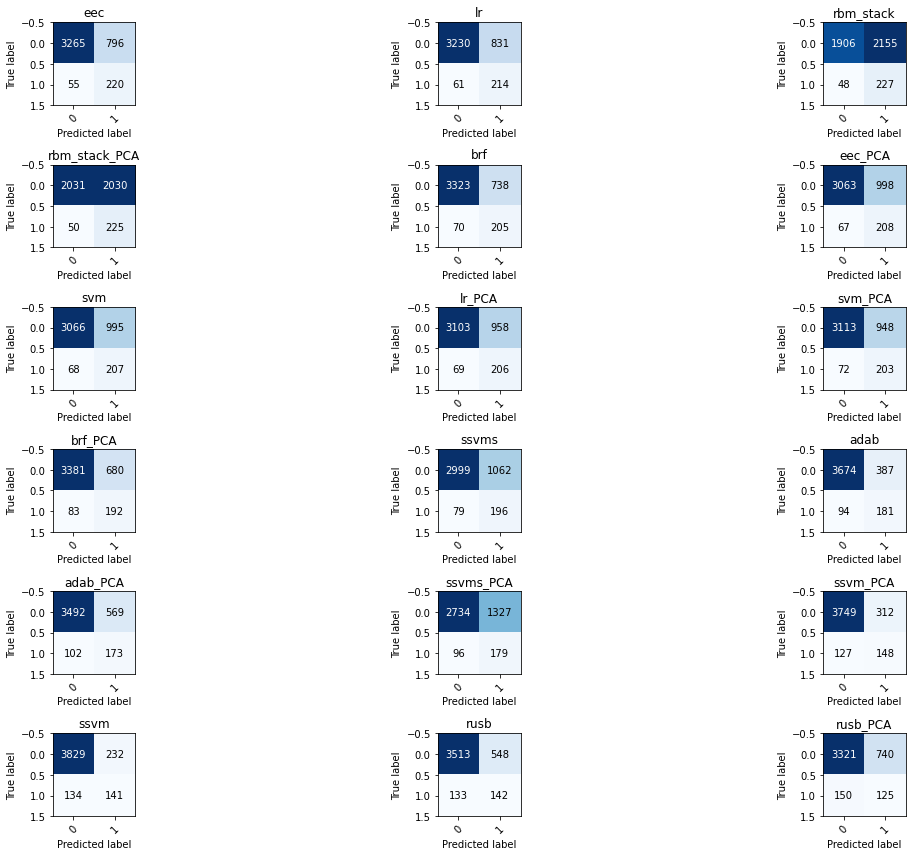

In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title=None,
                              cmap=plt.cm.Blues,
                              fig=None, ax=None
                              ):

        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if ax is None:
            fig, ax = plt.subplots()

        if title is None:
            title = 'Confusion matrix'
            if normalize:
                title = title + "(%)"

        if normalize:
            # Normalize by row sums
            cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.around( 100 * cm_pct, decimals=0).astype(int)

            #print("Normalized confusion matrix")
        else:
            #print('Confusion matrix, without normalization')
            pass

        ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.set_title(title)

        tick_marks = np.arange(len(classes))
        ax.set_xticks(classes)
        ax.tick_params(axis='x', labelrotation=45)

        fmt = 'd'
        
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            # Plot coordinate system has origin in upper left corner
            # -  coordinates are (horizontal offset, vertical offset)
            # -  so cm[i,j] should appear in plot coordinate (j,i)
            _= ax.text(j, i, format(cm[i, j], fmt),
                       horizontalalignment="center",
                       verticalalignment="center",
                       color="white" if cm[i, j] > thresh else "black")

        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')
        plt.tight_layout()

        return fig, ax


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

fig,ax=plt.subplots(6,3, figsize=(24,12))

labels = [0, 1]
top_models = score_df1.T.sort_values('bkrclf_accuracy', ascending=False).index[:18]
for n, clf_name in enumerate(top_models):
    y_pred_val = cross_val_predict(models[clf_name], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_pred_val)
    _= plot_confusion_matrix(cm=cm, classes=labels, ax=ax[n // 3][n - 3 * (n // 3)], title=clf_name, normalize=False)

Using confusion matrix above, it is easy to recognize a general pattern distinguishing the winner models from the loser models. 

For winner models, they win because they do a very good job in achieving a large number of TP values. That being said, if the model pushes too many weights on TP, it still becomes losers because the FP numbers get increased significantly and thus get TN numbers decreased. We should keep in mind that even though the guideline says that TP is 5 times important than TN, that doesn't mean TN is not important at all. Since my score is a weighted average of TP's dstribution and TN's distribution, one model with great recall score can still be excluded if it fails to trade off with negative samples. 

Take the best model `eec` for instance, it is not the best model in predicting TP, whose TP number is slightly less than the best one but significantly outnumbers others. But on the other hand, the number of TN it predicts, while is still much lower than the best TN predictor, is almost close to or slightly larger than the others and particularly larger than its counterparts who have a high rank of TP numbers. This hereby moves this model to the best place. A contrast is `rbm_stack`, while it predicts the highest TP numbers, it also achieves a lowest TN numbers, which undermines the weighted performance. 

One particular pattern of loser model, such as `rbm_stack`, `ssvms` is that they crazily predict positive samples with very low quality. Thus, their TP number might not be that large, and their TN number can get reduced significantly. These patterns are common especially among ensemble classifiers where data gets over-sampled before fit into each base classifiers. Since over-sampling itself contains kinds of random states, and over-sampling is creating something doesn't exist in reality at all, this exposure drives classifiers to make a larger number of positive examples (and we do witness a much larger number of positive predictions made by these models and undermines the inherent prediction quality of its predictions).

**Conclusion**
* In all, the winner model should get TP number as large as possible, and on the base that it has achieved an ability to predict TP very well, it should predict TN well too.
* Take care of over-sampling, by studying the strategy's parameters and be even more careful with its multiplied impact on classifier if it is put into an ensemble (under-sampling in this context should be better).


**Analysis of individual error**

In this part, I try some analysis on individual error within per-sample level, so that I can detect some features or just ideas that later I can implement to help classifier avoid these errors or find patterns more easily.

Below I write a function to output correctly classified and misclassified samples.

In [57]:
def ind_err(X_train_, y_train_, model_, transformers_=transformers3, features_=training_features):
    
    y_pred_val_ = cross_val_predict(model_, X_train_, y_train_, cv=5)
    
    X_train_look_ = X_train_.copy()
    transformers_.fit(X_train_look_)
    X_train_look_ = transformers_.transform(X_train_look_)

    X_train_look_df_ = pd.DataFrame(X_train_look_, columns=features_)
    X_train_look_df_['y_label'] = y_train_
    X_train_look_df_['y_pred'] = y_pred_val_

    mismatch_df_ = X_train_look_df_[X_train_look_df_['y_label'] != X_train_look_df_['y_pred']]
    match_df_ = X_train_look_df_[X_train_look_df_['y_label'] == X_train_look_df_['y_pred']]
    
    return match_df_, mismatch_df_

In [58]:
match_df, mismatch_df = ind_err(X_train, y_train, models['eec'], transformers_=transformers3, features_=training_features)

I take a look at the overall description of misclassified samples.

In [59]:
mismatch_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,y_label,y_pred
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,...,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,-0.066767,0.080491,-0.068976,-0.061239,-0.073006,-0.068409,-0.065824,-0.065760,0.024344,-0.079746,...,-0.029214,0.059086,0.014654,0.000644,0.037944,0.060132,-0.046702,0.018453,0.064630,0.935370
std,0.110606,0.105553,0.116240,0.089963,0.109276,0.089183,0.110329,0.074734,0.144121,0.105835,...,0.138258,0.102936,0.137806,0.124331,0.137902,0.130903,0.107722,0.134568,0.246016,0.246016
min,-0.217221,-0.181210,-0.330307,-0.220685,-0.292240,-0.293512,-0.211846,-0.160089,-0.201998,-0.263129,...,-0.239941,-0.351135,-0.138940,-0.186861,-0.212508,-0.175132,-0.193541,-0.172341,0.000000,0.000000
25%,-0.156894,0.000347,-0.152866,-0.107309,-0.160140,-0.149555,-0.153069,-0.104128,-0.094551,-0.165220,...,-0.150840,0.024752,-0.071790,-0.086704,-0.081704,-0.062254,-0.117792,-0.076008,0.000000,1.000000
50%,-0.087446,0.106588,-0.104570,-0.091005,-0.081925,-0.047364,-0.090935,-0.088483,-0.048860,-0.106268,...,-0.077822,0.099104,-0.060118,-0.040755,0.005782,0.059980,-0.095132,-0.043975,0.000000,1.000000
75%,-0.021503,0.166495,0.000541,-0.057238,-0.007765,-0.032025,-0.023778,-0.061240,0.164865,-0.004971,...,0.089032,0.129151,0.065788,0.048750,0.160381,0.188323,-0.004726,0.089002,0.000000,1.000000
max,0.246905,0.266282,0.216864,0.291635,0.264849,0.359046,0.240911,0.264544,0.442631,0.191136,...,0.300742,0.201295,0.452479,0.424424,0.428364,0.314417,0.297515,0.395262,1.000000,1.000000


<AxesSubplot:>

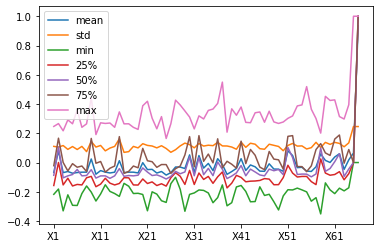

In [60]:
mismatch_df.describe().T.drop('count', axis=1).plot()

The visualization above both in table and chart contains too many features and thus information for me to detect something. I then should try to lower the dimension and try to find some patterns among 2 or 3 features.

It is unwise to plot every two features because 64\*64 is quite a large number.

When detecting which features to look at, I recall `RandomForest()` as well as `BalancedRandomForest()` can both detect feature importance. I then call this attribute of `BalancedRandomForest()` to give a list of these 64 features' importance.

In [61]:
from sklearn.base import clone
t_brf = models['brf']
t_brf.fit(X_train, y_train)
m = t_brf['brf'].feature_importances_
m

Pipeline(steps=[('transformers',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('clipper',
                                  <__main__.OutlierClipper1 object at 0x00000253249029D0>),
                                 ('scaler', StandardScaler()),
                                 ('normer', Normalizer())])),
                ('brf', BalancedRandomForestClassifier(random_state=0))])

array([0.02508124, 0.01438342, 0.00862999, 0.01068264, 0.01029349,
       0.02521486, 0.01651089, 0.01483792, 0.01143037, 0.01416371,
       0.0195226 , 0.01718499, 0.020477  , 0.01612683, 0.03065708,
       0.01627655, 0.01372404, 0.0205287 , 0.01836117, 0.00959034,
       0.0251172 , 0.01501545, 0.01940465, 0.01967193, 0.03500167,
       0.015029  , 0.01567891, 0.00978415, 0.02204497, 0.00820125,
       0.01807531, 0.0100765 , 0.00944916, 0.01027143, 0.03436432,
       0.00977335, 0.01491424, 0.02156381, 0.04940748, 0.01093783,
       0.02465054, 0.01268594, 0.00991129, 0.01058936, 0.01312521,
       0.01675195, 0.00973838, 0.00988922, 0.01098442, 0.0077094 ,
       0.01507998, 0.00989472, 0.00991518, 0.01148565, 0.01558694,
       0.01279658, 0.01229739, 0.01034094, 0.01056767, 0.00863444,
       0.01651208, 0.01083535, 0.00902103, 0.0135359 ])

I decide to choose the top 5 important features and the bottom 5 important features and plot relationships of misclassified samples among these two groups separately. 

I plot among the top 5 because the model allocates more weights to this group of features, so a patten ignored in this group but later detected by this error analysis can improve the performance more significantly. But since model has given more weights to this group, the pattern should have been well detected by the model and left nothing for we human. Still, I want to take the chance.

I plot among the bottom 5 because the model allocates less weights so it fails to catch any pattern clearly. This means there can be some room for human eyes to explore more.

Above I find the top 5 important features. When plotting, I hardcode their index to avoid any kind of randomness. From the scatter plot, I find that samples of both classes overlap with each other and cannot identify any separatable clusters.

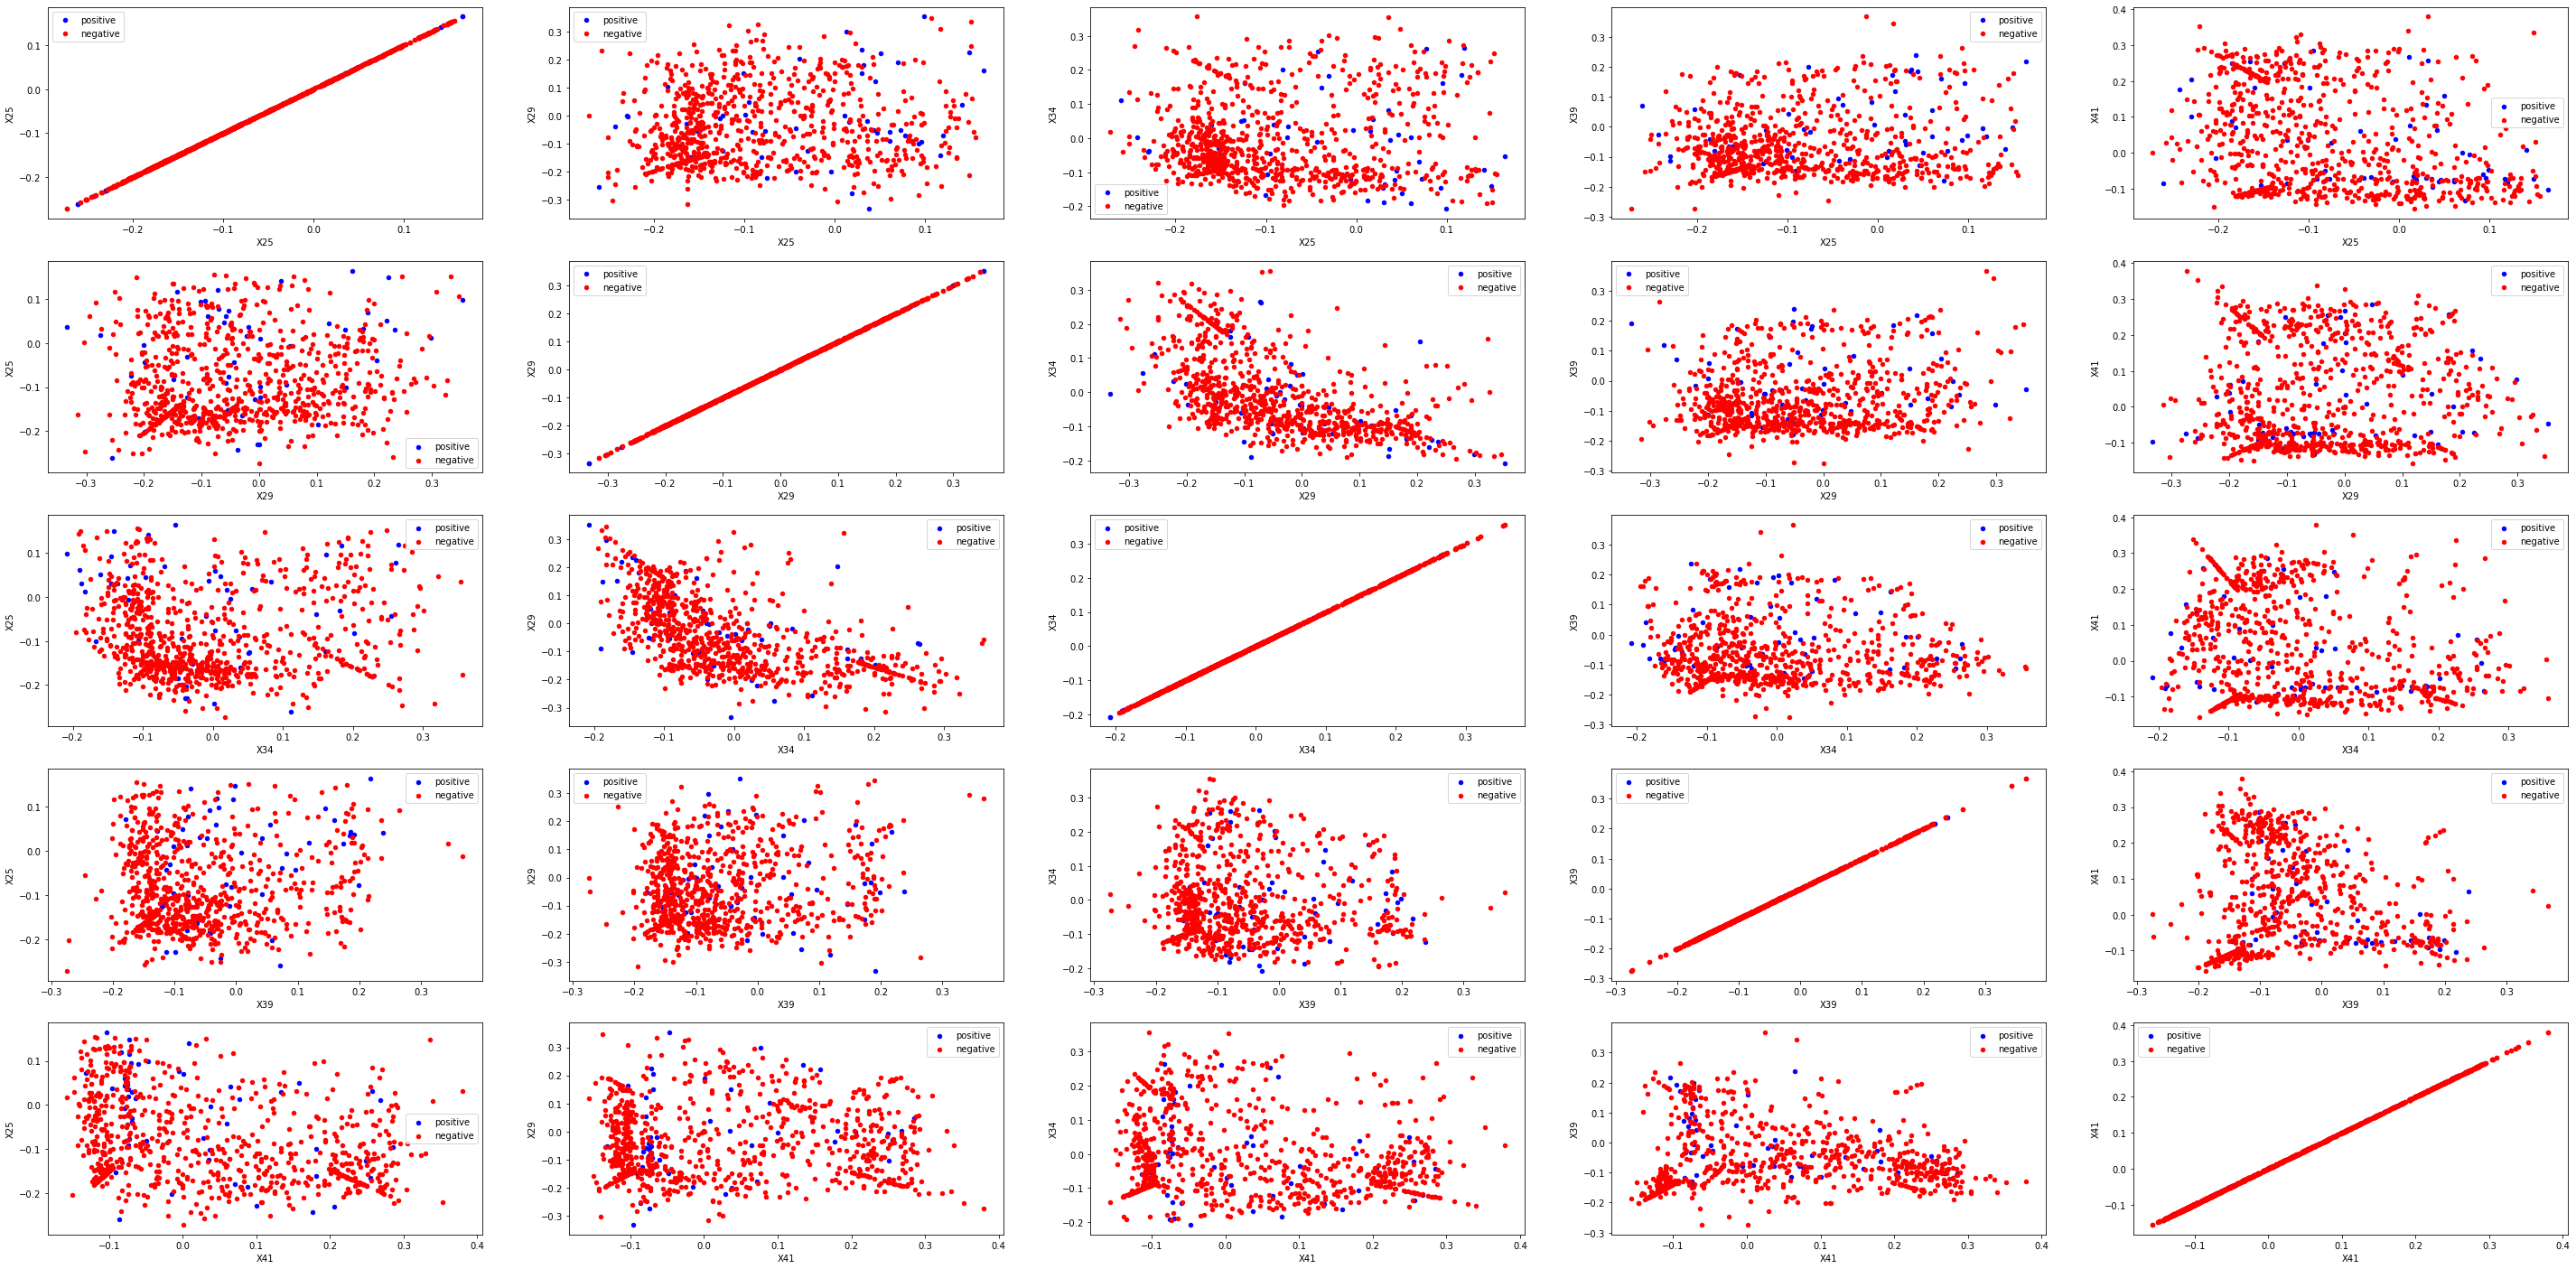

In [62]:
id_list = ['X' + str(i + 1) for i in [24, 28, 33, 38, 40]]
fig,ax=plt.subplots(5,5, figsize=(50,25))
for nx, fx in enumerate(id_list):
    for ny, fy in enumerate(id_list):
        _ = mismatch_df[mismatch_df['y_label'] == 1][[fx, fy, 'y_label']].plot.scatter(x=fx, y=fy, label='positive', ax=ax[nx][ny], color='blue')
        _ = mismatch_df[mismatch_df['y_label'] == 0][[fx, fy, 'y_label']].plot.scatter(x=fx, y=fy, label='negative', ax=ax[nx][ny], color='red')

Above I find the bottom 5 important features. When plotting, I hardcode their index to avoid any kind of randomness. From the scatter plot, I find that samples of both classes overlap with each other and cannot identify any seperatable clusters.

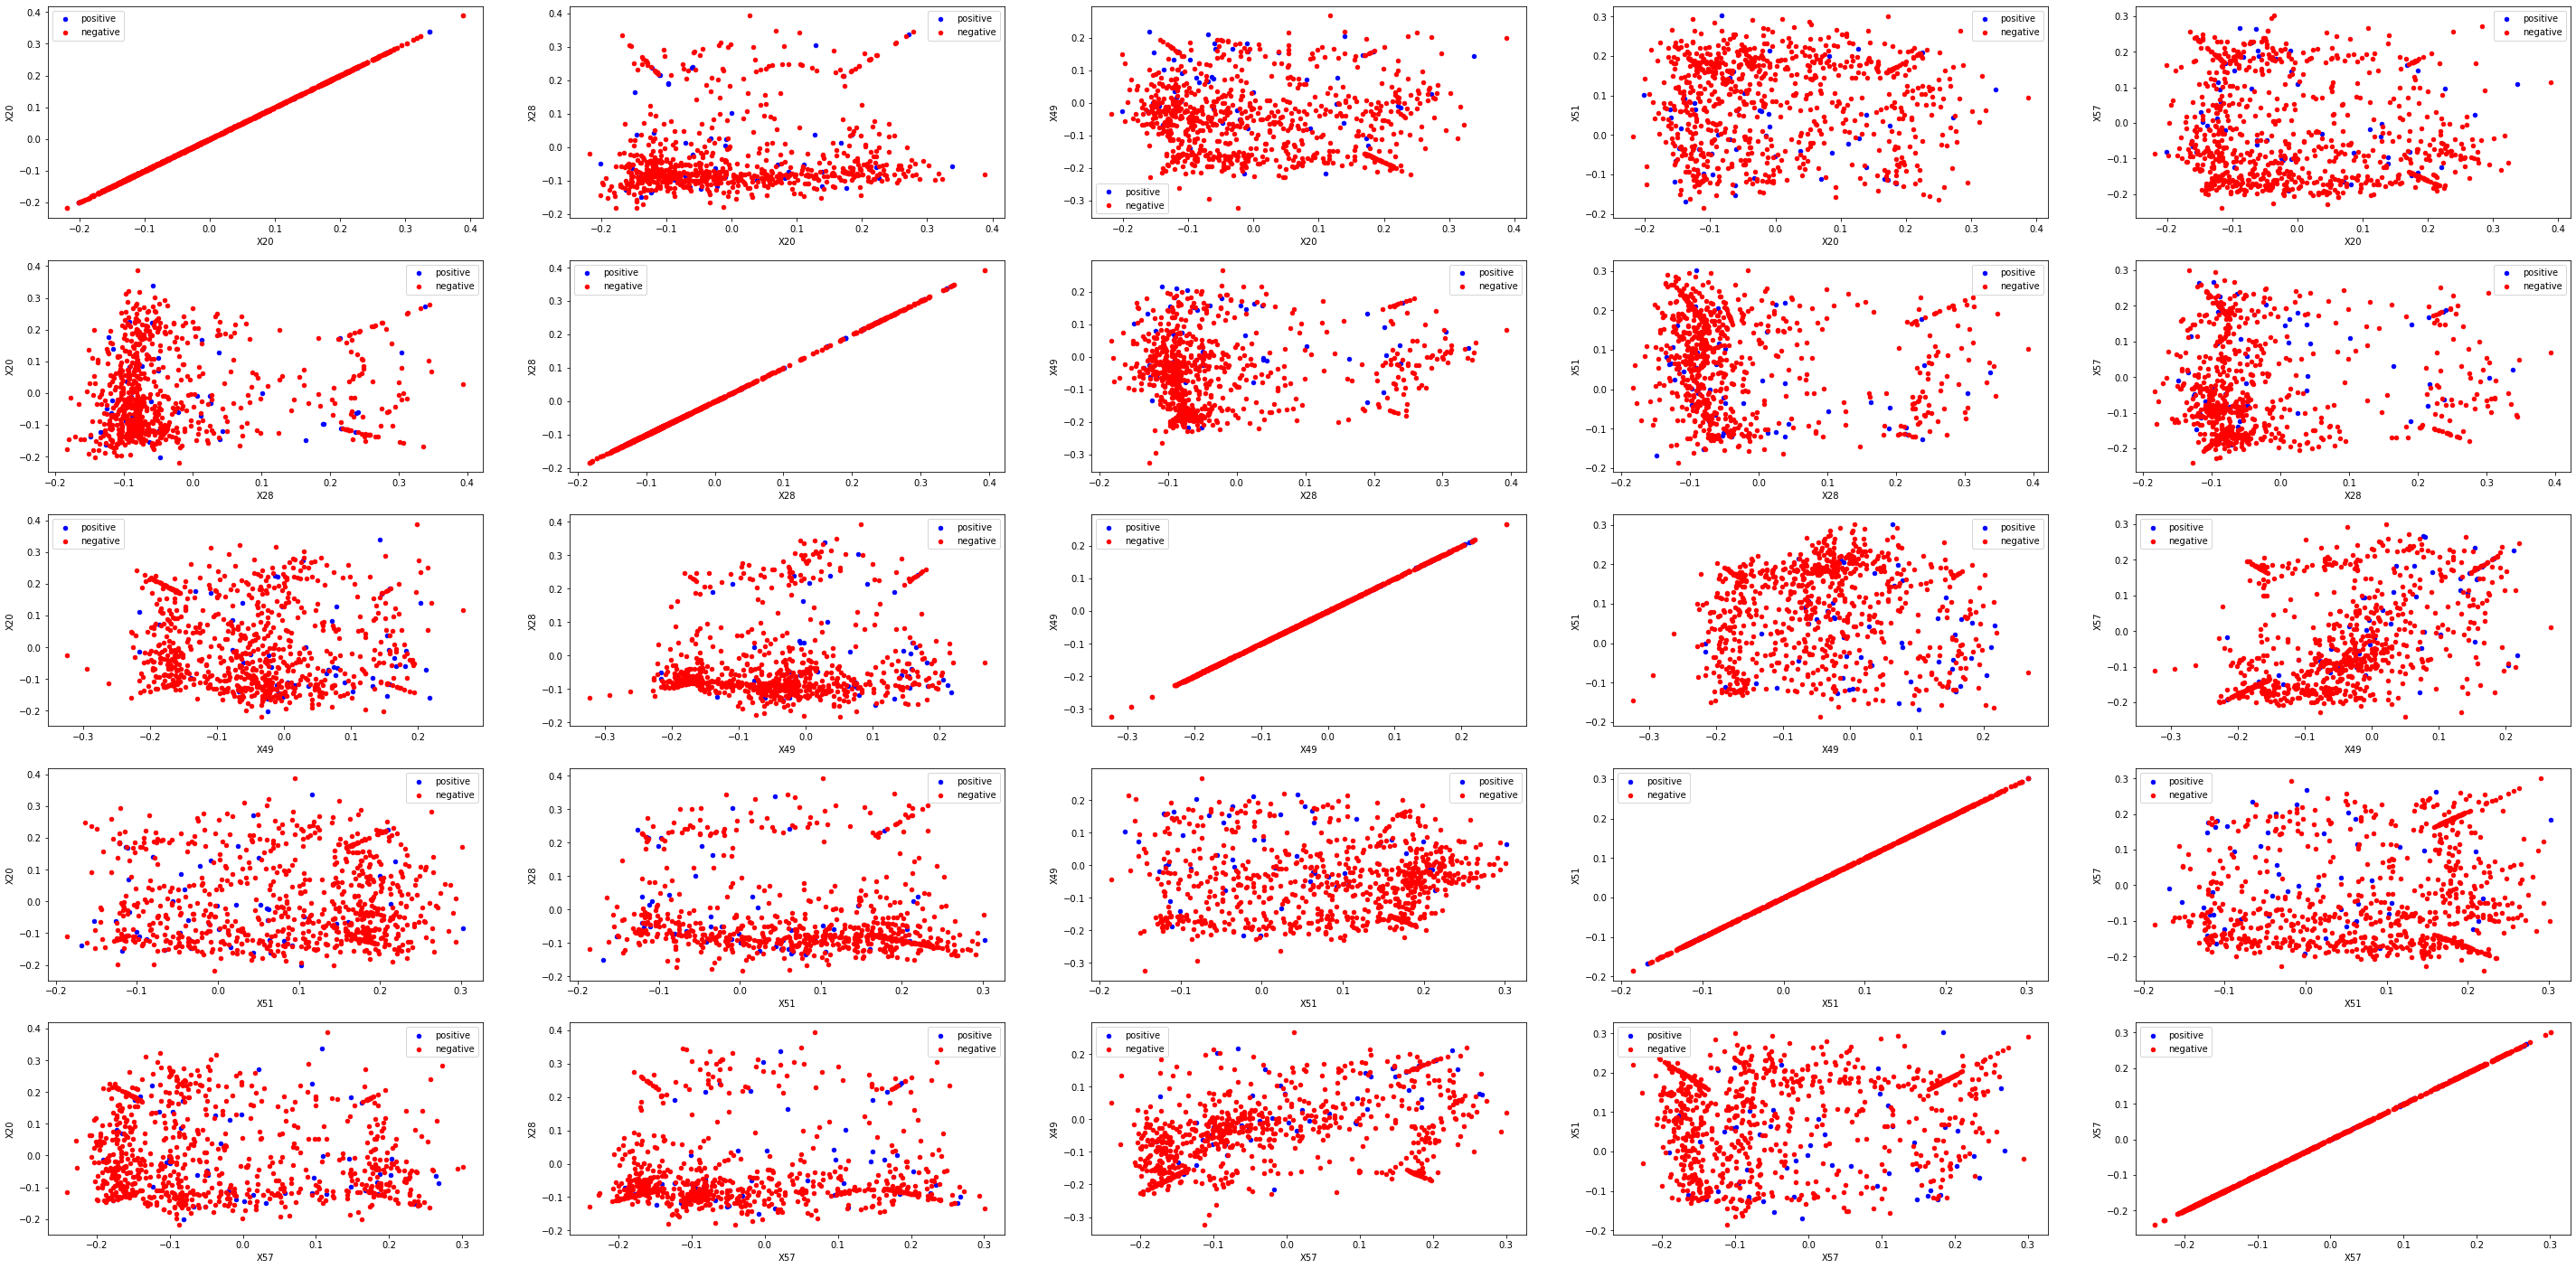

In [63]:
id_list = ['X' + str(i + 1) for i in [19, 27, 48, 50, 56]]
fig,ax=plt.subplots(5,5, figsize=(50,25))
for nx, fx in enumerate(id_list):
    for ny, fy in enumerate(id_list):
        _ = mismatch_df[mismatch_df['y_label'] == 1][[fx, fy, 'y_label']].plot.scatter(x=fx, y=fy, label='positive', ax=ax[nx][ny], color='blue')
        _ = mismatch_df[mismatch_df['y_label'] == 0][[fx, fy, 'y_label']].plot.scatter(x=fx, y=fy, label='negative', ax=ax[nx][ny], color='red')

Therefore, I regret to conclude that individual error analysis fails to spot anything new.

### D.5 Fine tune 

Below I conduct fine tuning according to the hyperparameter lists I constructed for certain classifiers of top performance.

In [64]:
from sklearn.model_selection import GridSearchCV
search_dict = {}
search_model = ['eec', 'lr', 'rbm_stack', 'brf', 'svm',
               'eec_PCA', 'lr_PCA', 'rbm_stack_PCA', 'brf_PCA', 'svm_PCA']
for name in search_model:
    model = models[name]
    print(name)
    if name in params.keys():
        print('conduct searching...')
        search = GridSearchCV(estimator=model, param_grid=params[name], scoring=bkrclf_accuracy)
        search.fit(X_train, y_train)
        search_dict[name] = search
    else:
        print('skip searching...')
        continue

eec
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253249029D0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer())])),
                                       ('eec',
                                        EasyEnsembleClassifier(random_state=0))]),
             param_grid={'eec__n_estimators': (5, 10, 15),
                         'eec__random_state': (0,)},
             scoring=make_scorer(bkrclf_accuracy_score))

lr
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253249029D0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer())])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0,
                                                           solver='liblinear'))]),
             param_grid={'lr

rbm_stack
skip searching...
brf
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253249029D0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer())])),
                                       ('brf',
                                        BalancedRandomForestClassifier(random_state=0))]),
             param_grid={'brf__max_depth': (10, 20, None),
                         'brf__max_features': ('auto', 'log2'),
                         'brf__min_samples_leaf': (2, 1

svm
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253249029D0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer())])),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            gamma='auto', random_state=0))]),
             param_grid={'svm__C': (0.5, 1, 2),
                         'svm__class_weight': ('balanced',),
             

eec_PCA
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253264987C0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer()),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('eec',
                                        EasyEnsembleClassifier(random_state=0))]),
             param_grid={'eec__n_estimat

lr_PCA
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253264987C0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer()),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                        

rbm_stack_PCA
skip searching...
brf_PCA
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253264987C0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer()),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('brf',
                                        BalancedRandomForestClassifier(random_state=0))]),
             param_grid={'brf__m

svm_PCA
conduct searching...


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('clipper',
                                                         <__main__.OutlierClipper1 object at 0x00000253264987C0>),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('normer',
                                                         Normalizer()),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            gamma='aut

In [65]:
search_summary_dict = {}
best_score_list = []
best_params_list = []
for clf in search_dict.keys():
    search_data = pd.DataFrame(search_dict[clf].cv_results_).sort_values('mean_test_score', ascending=False)
    best_score_list.append(search_data['mean_test_score'][0])
    best_params_list.append(search_data['params'][0])
    
search_summary_dict['best_score'] = best_score_list
search_summary_dict['best_params'] = best_params_list
search_summary_df = pd.DataFrame(search_summary_dict, index=search_dict.keys())
search_summary_df

,best_score,best_params
eec,0.813108,"{'eec__n_estimators': 5, 'eec__random_state': 0}"
lr,0.768597,"{'lr__C': 0.5, 'lr__class_weight': 'balanced',..."
brf,0.769705,"{'brf__max_depth': 10, 'brf__max_features': 'a..."
svm,0.779323,"{'svm__C': 0.5, 'svm__class_weight': 'balanced..."
eec_PCA,0.740777,"{'eec__n_estimators': 5, 'eec__random_state': 0}"
lr_PCA,0.745736,"{'lr__C': 0.5, 'lr__class_weight': 'balanced',..."
brf_PCA,0.698948,"{'brf__max_depth': 10, 'brf__max_features': 'a..."
svm_PCA,0.763179,"{'svm__C': 0.5, 'svm__class_weight': 'balanced..."


**After hyperparameter tuning, `eec` is still the best model with highest score. I thus determine it as the final model.**

## Conclusion

Finally, I use the test set to test my model's performance.

Below is my metric for model performance.

In [69]:
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score

def bkrclf_accuracy_score(y_true, y_pred, *, sample_weight=None):
    C = confusion_matrix(y_true, y_pred, sample_weight=sample_weight)
    with np.errstate(divide="ignore", invalid="ignore"):
        per_class = np.diag(C) / C.sum(axis=1)

    score = np.array([1/6, 5/6]) @ per_class
    return score
bkrclf_accuracy = make_scorer(bkrclf_accuracy_score) 

In [70]:
import pandas as pd
import numpy as np
import os
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def MyModel(X):
    name_ = 'Easy Ensemble APP'
    # my class for outlier clipping
    class OutlierClipper1():
        def __init__(self):
            self.ther = []
        def fit(self, X, y=None):
            X_df = pd.DataFrame(X)
            for i in X_df.columns:
                self.ther.append((X_df[i].quantile(0.10), X_df[i].quantile(0.90)))
            return self
        def transform(self, X):
            X_df = pd.DataFrame(X)
            for i in X_df.columns:
                low, high = self.ther[i]
                X_df[i] = np.where(X_df[i] > high, high, X_df[i])
                X_df[i] = np.where(X_df[i] < low, low, X_df[i])
            return X_df.values
        
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # convert numeric and drop features
    X = X.drop('Id', axis=1)
    for f in X.columns:
        if X[f].dtype == 'O':
            X[f] = pd.to_numeric(X[f], errors='coerce')
    
    # build the pipeline
    transformers_= Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                              ('clipper', OutlierClipper1()),     
                              ('scaler', StandardScaler()),
                               ('normer', Normalizer())
                                ] )
    
    clf_ = EasyEnsembleClassifier(n_estimators=5, random_state=0)
    model_ = Pipeline(steps=[
                    ('transformers', transformers_),
                    ('clf_final', clf_)
                ])
    
    # train the model, inside this function we read data and train the model and then run in-sample test
    DATA_DIR_ = "./Data"

    if not os.path.isdir(DATA_DIR_):
        DATA_DIR_ = "../resource/asnlib/publicdata/bankruptcy/data"


    data_file_ = "5th_yr.csv"
    data_ = pd.read_csv( os.path.join(DATA_DIR_, "train", data_file_) )
    data_ = data_.drop('Id', axis=1)
    for f in data_.columns:
        if data_[f].dtype == 'O':
            data_[f] = pd.to_numeric(data_[f], errors='coerce')
            
    X_ = data_.iloc[:, :64]
    y_ = data_['Bankrupt']
    
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_.values, y_.values, test_size=0.1, random_state=42)
    
    model_.fit(X_train_, y_train_)
    
    y_test_pred_ = model_.predict(X_test_)
    
    accuracy_test_ = accuracy_score(y_test_, y_test_pred_)
    recall_test_ = recall_score(y_test_, y_test_pred_, pos_label=1, average="binary")
    precision_test_ = precision_score(y_test_,   y_test_pred_, pos_label=1, average="binary")
    bkrclf_test_ = bkrclf_accuracy_score(y_test_, y_test_pred_)


    print("\t{m:s} In Sample Test Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}, Bkrclf Score {b:3.1%}".format(m=name_,
                                                                            a=accuracy_test_,
                                                                            r=recall_test_,
                                                                            p=precision_test_,
                                                                            b=bkrclf_test_
                                                                            ))

    
    # make predictions for hold data
    predictions = model_.predict(X.values)
    
    
    
    return predictions


In [74]:
X_hold = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

# Predict using MyModel
y_hold_pred = MyModel(X_hold)
y_hold_pred.shape


	Easy Ensemble APP In Sample Test Accuracy: 77.8%, Recall 75.8%, Precision 20.2%, Bkrclf Score 76.1%


(1092,)

In [ ]:
'''

accuracy_hold = accuracy_score(y_hold, y_hold_pred)


recall_hold = recall_score(y_hold, y_hold_pred, pos_label=1, average="binary")


precision_hold = precision_score(y_hold,   y_hold_pred, pos_label=1, average="binary")


print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_hold,
                                                                            r=recall_hold,
                                                                            p=precision_hold
                                                                            ))
'''

## Reference

[1] Chen Chao, Liaw A, Breiman L. Using random forest to learn imbalanced data [OL]. 2004[2020-01-05]．http://dx.doi.org∕

[2] Seiffert C,Khoshgoftaar T M, Hulse J V,et al．A hybrid approach to alleviating class imbalance [J]. IEEE Transactionson Systems, Man, and Cybernetics-Part A: Systems and Humans, 2009, 40(1): 185-197

[3] Liu Xuying, Wu Jianxin, Zhou Zhihua, et al．Exploratory undersampling for class-imbalance learning [J]．IEEE Transactions on Systems, Man, and Cybernetics, PartB: Cybernetics, 2008, 39(2): 539-550

[4] Chawla N V, Bowyer K W, Hall L O, et al. SMOTE: Synthetic minority over-sampling technique [J]. Journal of Artificial Intelligence Research, 2002, 16: 321-357

[5] Nguyen H M,Cooper E W, Kamei K．Borderline over-sampling for imbalanced data classification [J]．International Journal of Knowledge Engineering and Soft Data Paradigms, 2009, 3(1): 4-21

[6] Yu Lean, Zhou Rongtian, Tang Ling, et al. A DBN-based resampling SVM ensemble learning paradigm for credit classification with imbalanced data [J]．Journal of Applied Soft Computing, 2018, 69: 192-202

[7] Sohony I, Pratap R, Nambiar U．Ensemble learning for credit card fraud detection [C] // Procof ACM India Joint Int Confon Data Science and Management of Data. New York: ACM, 2018: 289-294

[8] Kazemi Z, Zarrabi H. Using deep networks for fraud detection in the credit card transactions [C] // Procof the 4th IEEE Int Conf on Knowledge-Based Engineering and Innovation (KBEI). Piscataway, NJ: IEEE,2017: 630-633

[9] Roy A, Sun J, Mahoney R, et al. Deep learning detecting fraud in credit card transactions [C] // Procof Systems and Information Engineering Design Symp (SIEDS). Piscataway, NJ: IEEE, 2018: 129-134

[10] Luo Cuicui, Wu Desheng, Wu Dexiang. A deep learning approach for credit scoring using credit default swaps [J]. Journal of Engineering Applications of Artificial Intelligence, 2017, 65(1): 465-470